<a href="https://colab.research.google.com/github/PepoAmbriz/Investigaci-n-de-Operaciones/blob/main/PF_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#           Proyecto Final de Investigación de Operaciones
José Francisco Ambriz Gutiérrez 

Universidad de Guanajuato, División de Ciencias e Ingenierías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import sympy as sy

# El Método Gráfico

El método gráfico es un método de optimización muy sencillo que es sumamente util para introducirnos al mundo de la investigación de operaciones. En el método gráfico no se utiliza nada mas que el problema y nuestra habilidad para realizar gráficas. 

Consiste en la busqueda de un valor óptimo para cierto problema que se encuentra restringido por medio de variables a las que llamamos de decisión. Primero se debe entender el problema, después se realiza la gráfica de las restricciones y finalmente, con la ecuación a optimizar se busca el valor óptimo según sea el caso, es importante notar que normalmente las soluciones se encuentran en los vértices de la región factible que es la delimitada por las rectas de las restricciones.

Ejemplo:

La empresa Pepo Technologies necesita maximizar sus ganancias para abrir una nueva sede en California. PepoTech tiene 2 productos principales, una batería solar de larga duración y un traje elástico protector. Las baterías tienen un costo de 1288 pesos y los trajes de 4700. 

Se tiene una demanda de baterías de 75000 al mes mientras que la demanda de trajes es de 40000 al mes. La empresa solo puede producir un total de 50000 productos en un mes y por cada traje producido obligatoriamente se producen 3 baterías. ¿Cuántas baterías y cuantos trajes se deben producir?

Solución:

Lo primero que debemos hacer es un modelo matemático para el problema, en este caso las variables son las baterías ($x_1$) y los trajes (x_2). La ecuación de ganancias entonces será
$$Z=1288 x_1 + 4700 x_2$$
También tenemos restricciones dadas por la demanda de los productos y por la capacidad de producción de los mismos. Por la demanda tenemos 
$$x_1 \leq 75000$$
$$x_2 \leq 40000$$
Por capacidad de producción
$$x_1+x_2 \leq 50000$$
$$3x_1=x_2$$

Primero graficamos todas las restricciones

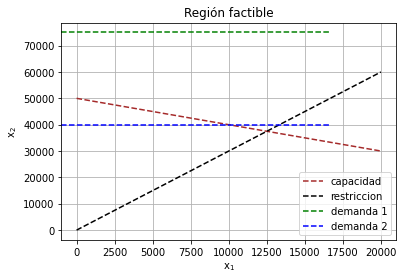

16174400


In [ ]:
#Método Gráfico de programación lineal IO
x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
u=(50000-x)                               #Producción
v=(3*x)                                    #Producción
plt.plot(x,u,c='brown',linestyle='--')
plt.plot(x,v,c='black',linestyle='--')
plt.axhline(y=75000, xmin=0.0, xmax=0.8,c='green', linestyle='--')  #demanda
plt.axhline(y=40000, xmin=0.0, xmax=0.8,c='blue', linestyle='--')   #demanda

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=3800
x2=2400
Z = 1288*x1 + 4700*x2          #Ecuación de ganancia
#Ecuacion a graficar 

def y(x):
  return (-1288*x + Z)/4700
#Graficamos Z (A maximizar)
#plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
#plt.xlim(0,4500)
#plt.ylim(0,4000)
plt.legend(['capacidad','restriccion','demanda 1','demanda 2'],loc='lower right')
plt.grid()
plt.show()
print(Z)

Sabemos que no nos sirve producir mas que la demanda pues se quedará mercancía sin vender, entonces debemos mantenernos al mismo tiempo bajo las líneas azul y verde.

Sabemos que la empresa produce 3 pilas por cada traje, ni mas ni menos, entonces debemos estar sobre la linea negra.

Sabemos que a lo mas podemos producir 50000 productos entonces debemos estar bajo la linea café.

De ver la gráfica podemos elegir la intersección café-negro que es en (12500,38000) aproximadamente, por lo que damos ese par ordenado a la ecuación de Z y la graficamos

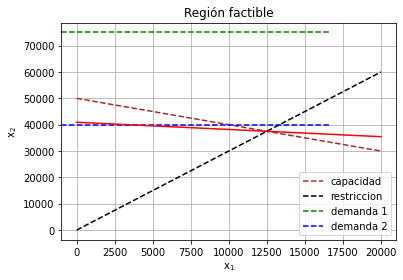

192350000


In [ ]:
#Método Gráfico de programación lineal IO
x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
u=(50000-x)                               #Producción
v=(3*x)                                    #Producción
plt.plot(x,u,c='brown',linestyle='--')
plt.plot(x,v,c='black',linestyle='--')
plt.axhline(y=75000, xmin=0.0, xmax=0.8,c='green', linestyle='--')  #demanda
plt.axhline(y=40000, xmin=0.0, xmax=0.8,c='blue', linestyle='--')   #demanda

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=12500
x2=37500
Z = 1288*x1 + 4700*x2          #Ecuación de ganancia
#Ecuacion a graficar 

def y(x):
  return (-1288*x + Z)/4700
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
#plt.xlim(0,4500)
#plt.ylim(0,4000)
plt.legend(['capacidad','restriccion','demanda 1','demanda 2'],loc='lower right')
plt.grid()
plt.show()
print(Z)

Luego de una inspección se corrigió la solución a (12500, 37500), una vez ahí probamos si es el valor máximo probando los valores inmediatos de los lados, y efectivamente, la ganancia disminuye, es por ello que nos quedamos en este par ordenado que es el valor óptimo.
$$Z=192,350,000$$

**Ejercicios**



---

Caso 3.1 \\
Automobile Alliance, una gran compañía manufacturera de
automóviles, organiza los vehículos que fabrica en tres familias:
camiones, automóviles pequeños y una familia de autos
medianos y de lujo. Una planta fuera de Detroit, MI, ensambla
dos modelos de la familia de autos medianos y de lujo. El primer
modelo, el Thrillseeker, es un sedán cuatro puertas con
asientos de vinil, interiores de plástico, características estándar
y un excelente rendimiento. Se promociona como una buena
compra para familias de clase media con presupuestos reducidos.
Cada Thrillseeker que se vende genera una ganancia
modesta de \$3 600 para la compañía. El segundo modelo, el
Classy Cruiser, es un sedán de lujo de dos puertas con asientos
de piel, interiores de madera, características personalizadas y
gran capacidad de navegación. Se vende como un símbolo de
opulencia a familias de clase media-alta y cada uno genera una
buena ganancia de \$5,400. 

Rachel Rosencrantz, gerente de la planta de ensamblado,
debe decidir el programa de producción del próximo mes. En
especial, debe determinar cuántos Thrillseekers y cuántos Classy
Cruisers se tienen que ensamblar en la planta para maximizar
la ganancia de la compañía. Sabe que la planta tiene una capacidad
de 48,000 horas de mano de obra al mes. También, que
para ensamblar un Thrillseeker se emplean 6 horas-hombre y
un Cruise Classy 10.5 horas-hombre. 

Debido a que en la planta sólo se ensambla, las partes que
se requieren para los dos modelos no se producen en ella. En su
lugar, se envían de otras plantas ubicadas en el área de Michigan.
Por ejemplo, llantas, volantes, ventanas, asientos y puertas
llegan de varias plantas proveedoras. Para el próximo mes,
Rachel sabe que podrá obtener sólo 20,000 puertas (10,000 izquierdas
y 10 000 derechas) del proveedor de ellas. Una huelga
de trabajadores forzó el cierre de esa fábrica durante varios
días, y no podrá cumplir con su programa de producción para
el siguiente mes. Tanto el Thrillseeker como el Classy Cruiser
usan la misma puerta. 

Además, un pronóstico reciente de la compañía sobre la
demanda del mes de los diferentes modelos sugiere que la venta
del Classy Cruiser se limitaría a 3,500 autos. No existe un tope
a la demanda del Thrillseeker dentro de los límites de capacidad
de la planta de ensamblado.

**a)** Formule y resuelva un problema de programación lineal para
determinar el número de autos Thrillseeker y Classy Cruiser que
deben ensamblarse.

El problema se puede resumir en la siguiente tabla 
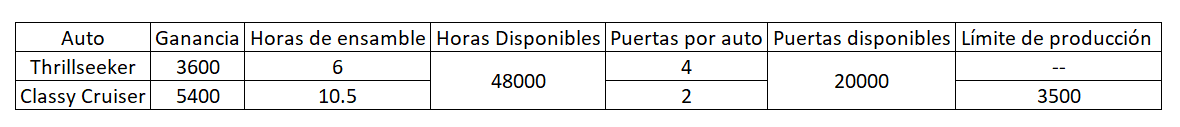




Entonces tenemos el siguiente problema:
$$Z=3600x_1+5400x_2$$
Sujeto a las siguientes condiciones 
$$x_2\leq 3500$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 6x_1+10.5x_2\leq 48000$$
$x_1$ y $x_2$ son mayores o iguales a cero.

La solución es la siguente.

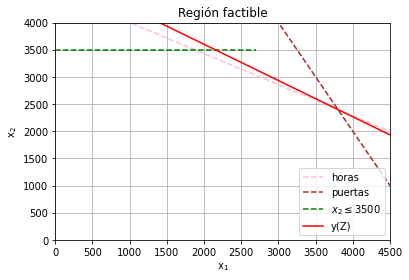

26640000


In [ ]:
#Método Gráfico de programación lineal IO


x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(48000-6*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=3500, xmin=0.0, xmax=0.6,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=3800
x2=2400
Z = 3600*x1 + 5400*x2
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (-3600*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4500)
plt.ylim(0,4000)
plt.legend(['horas','puertas','$x_2\leq 3500$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

Es importante hacer un zoom a las regiones factibles tal como en la gráfica anterior para poder probar valores con mas exactitud.
Finalmente tenemos una ganancia de \$26,640,000 con 3800 del Thrilseeker y 2400 del Classy Cruise.

---
Antes de tomar las decisiones de producción finales, Rachel
planea explorar los siguientes aspectos por separado, excepto
donde se indique otra cosa.

**b)** El departamento de marketing sabe que puede intentar una campaña
de publicidad de $500,000 que elevará la demanda del Classy
Cruiser 20% el próximo mes. ¿Debe realizarse la campaña?

La campaña de publicidad tiene para un mes un costo de \$500000, lo que modifica Z, además una restricción se modifica aumentando los 3500 cruiser un 20\%, por lo que ahora se piden 4200.
El problema queda entonces 
$$Z=3600x_1+5400x_2-500000$$
Sujeto a las siguientes condiciones 
$$x_2\leq 4200$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 6x_1+10.5x_2\leq 48000$$
$x_1$ y $x_2$ son mayores o iguales a cero.
Entonces, la solución será

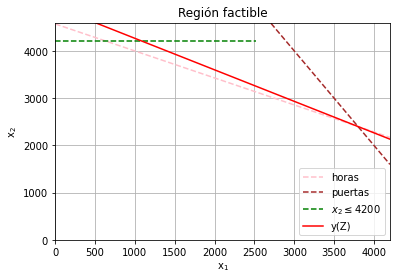

26140000


In [ ]:
#Método Gráfico de programación lineal IO
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(48000-6*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=4200, xmin=0.0, xmax=0.6,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=3800
x2=2400
Z = 3600*x1 + 5400*x2 - 500000
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (500000-3600*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4200)
plt.ylim(0,4600)
plt.legend(['horas','puertas','$x_2\leq 4200$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

tenemos una ganancia de \$26,140,000 con 3800 del Thrilseeker y 2400 del Classy Cruise. Es una ganancia menor ya que la nueva restricción no afecta en nada así que no es buena idea hacer el gasto de \$500,000

---
**c)** Rachel sabe que puede aumentar la capacidad de producción
de la planta el próximo mes si usa tiempo extra. El incremento
de horas-hombre puede ser de 25%. Con la nueva capacidad,
¿cuántos modelos Thrillseeker y cuántos Classy Cruiser deben
ensamblarse?

La restricción que cambia ahora es la de las horas de producción por lo que de 48,000 pasaremos a 60,000.
El problema queda 
$$Z=3600x_1+5400x_2$$
Sujeto a las siguientes condiciones 
$$x_2\leq 3500$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 6x_1+10.5x_2\leq 60000$$
$x_1$ y $x_2$ son mayores o iguales a cero.
La solución queda


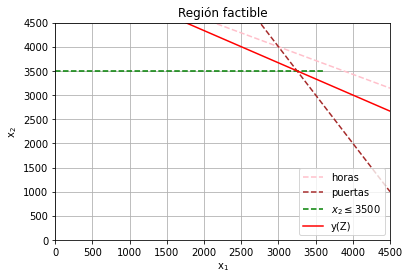

30600000


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(60000-6*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=3500, xmin=0.0, xmax=0.8,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=3250
x2=3500
Z = 3600*x1 + 5400*x2
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (-3600*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4500)
plt.ylim(0,4500)
plt.legend(['horas','puertas','$x_2\leq 3500$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

Tenemos una ganancia de \$30,600,000 por lo que si es bueno aumentar las horas de producción, pero al ver el gráfico vemos que la linea rosa puede descender un poco, así que podemos aumnetar menos horas con la misma ganancia. $x_1=3250$ y $x_2=3500$




---



**d)** Rachel sabe que el tiempo extra genera un costo adicional. ¿Cuál
es la máxima cantidad que debe estar dispuesta a pagar por todo
el tiempo extra adicional al costo del tiempo normal? Exprese su
respuesta como una sola suma.

En el caso original teníamos Z=\$26,640,000 ahora tenemos Z=\$30,600,000 por lo que a lo más debería poder gastar la diferencia, claro quepara que sea facible debería ser algo menor, la diferencia es de $3,960,000.


---
**e)** Rachel estudia la opción de usar tanto la campaña de publicidad
como las horas de tiempo extra. La campaña eleva 20%
la demanda del Classy Cruiser y el tiempo extra aumenta
25% la capacidad de la planta. ¿Cuántos modelos Thrillseeker y
cuántos Classy Cruiser deben ensamblarse con la campaña publicitaria
y las horas extra si cada Classy Cruiser que se venda
mantendrá su contribución de 50% más que la venta de un Thrillseeker?

Combinando las nuevas restricciones el problma será el siguiente
$$Z=3600x_1+5400x_2$$
Sujeto a las siguientes condiciones 
$$x_2\leq 4200$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 6x_1+10.5x_2\leq 60000$$
$x_1$ y $x_2$ son mayores o iguales a cero.

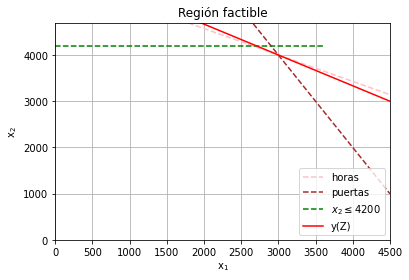

32400000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(60000-6*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=4200, xmin=0.0, xmax=0.8,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=3000
x2=4000
Z = 3600*x1 + 5400*x2
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (-3600*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4500)
plt.ylim(0,4700)
plt.legend(['horas','puertas','$x_2\leq 4200$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

Tenemos una ganancia de \$32,400,000 con $x_1=3000$ y $x_2=4000$.

---
**f)** Si se sabe que la campaña de publicidad cuesta \$500,000 y el uso
máximo de horas-trabajo de tiempo extra cuesta  1,600,000 más
que el tiempo normal, la solución que se encontró en el inciso e)
¿es adecuada comparada con la solución del inciso a)?

Solo queda restar los costos a la ganancia obtenida
$$ Z_{neta}=32400000-500000-1600000=30300000$$
nos queda una ganacia de \$30,300,000 lo que es considerablemente mayo que en el inciso a) así que es conveniente usar esta opción.

---
**g)** Automobile Alliance ha determinado que, en realidad, los distribuidores
hacen grandes descuentos al precio del Thrillseeker
para sacarlo del lote. Por un acuerdo de ganancias compartidas
con ellos, la compañía no obtendrá la ganancia de \$3,600 en el
Thrillseeker sino que ganará sólo 2,800. Determine el número
de autos Thrillseeker y de Classy Cruiser que deben ensamblarse
dado este nuevo precio con descuento.

Tomando el ejercicio original, el problema ahora va como 
$$Z=2800x_1+5400x_2$$
Sujeto a las siguientes condiciones 
$$x_2\leq 3500$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 6x_1+10.5x_2\leq 48000$$
$x_1$ y $x_2$ son mayores o iguales a cero.



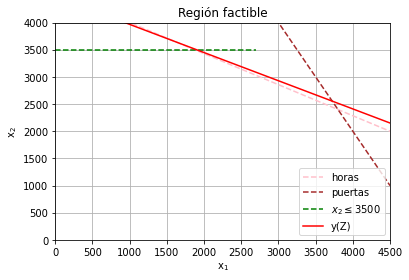

24220000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(48000-6*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=3500, xmin=0.0, xmax=0.6,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=1900
x2=3500
Z = 2800*x1 + 5400*x2
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (-2800*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4500)
plt.ylim(0,4000)
plt.legend(['horas','puertas','$x_2\leq 3500$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

En este caso la ganancia es de \$24,220,000 con $x_1=1900$ y $x_2=3500$

---
**h)** La compañía descubrió problemas de calidad en el Thrillseeker
mediante pruebas aplicadas aleatoriamente a unidades del Thrillseeker
al final de la línea de ensamblado. Los inspectores detectaron
que en más de 60% de los casos, dos de las cuatro puertas
del automóvil no sellaban bien. Como el porcentaje de autos
Thrillseeker defectuosos determinado por el muestreo aleatorio
es tan alto, el supervisor de planta decidió realizar pruebas de
control de calidad a todos los vehículos al final de la línea. Debido
a las pruebas adicionales, el tiempo para ensamblar un auto
aumentó de 6 a 7.5 horas. Determine el número de unidades de
cada modelo que deben ensamblarse dado este nuevo tiempo de
ensamblado.

El nuevo problema quedará como sigue
$$Z=3600x_1+5400x_2$$
Sujeto a las siguientes condiciones 
$$x_2\leq 3500$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 7.5x_1+10.5x_2\leq 48000$$
$x_1$ y $x_2$ son mayores o iguales a cero.



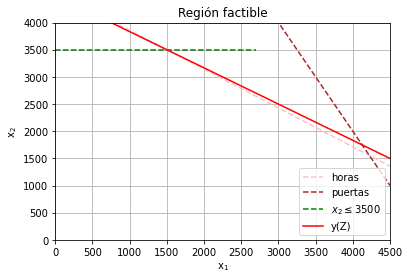

24300000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(48000-7.5*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=3500, xmin=0.0, xmax=0.6,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=1500
x2=3500
Z = 3600*x1 + 5400*x2
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (-3600*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4500)
plt.ylim(0,4000)
plt.legend(['horas','puertas','$x_2\leq 3500$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

En este caso la ganancia es de \$24,300,000 con $x_1=1500$ y $x_2=3500$

---
**i)** El consejo directivo de Alliance desea captar un mayor porcentaje
de mercado para el sedán de lujo y quisiera cumplir con
toda la demanda del Classy Cruiser. Por ello, pidieron a Rachel
que determine cuánto disminuiría la ganancia de su planta de
ensamblado comparada con la ganancia del inciso a). Pueden
pedirle que cumpla con toda la demanda de este modelo sólo si
la disminución de la ganancia no supera los \$2,000,000.

Las modificaciones serán las siguientes 
$$Z=3600x_1+5400x_2$$
Sujeto a las siguientes condiciones 
$$x_2= 3500$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 6x_1+10.5x_2\leq 48000$$
$x_1$ y $x_2$ son mayores o iguales a cero.


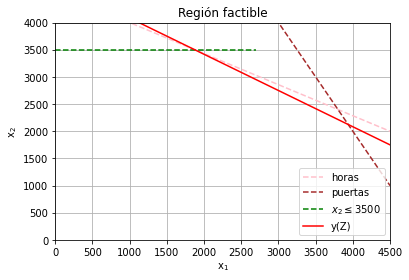

25650000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(48000-6*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=3500, xmin=0.0, xmax=0.6,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=1875
x2=3500
Z = 3600*x1 + 5400*x2
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (-3600*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4500)
plt.ylim(0,4000)
plt.legend(['horas','puertas','$x_2\leq 3500$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

En este caso la ganancia es de \$25,650,000 con $x_1=1875$ y $x_2=3500$, en el caso uno la ganancia era de \$26,640,000, la diferencia es menor a 2,000,000 por lo que es posible cumplir la demanda.

---
**j)** Rachel quiere tomar la decisión final combinando todas las consideraciones
de los incisos f), g) y h). ¿Cuáles son sus decisiones
finales respecto de la campaña publicitaria, las horas extra y el
número de autos Thrillseeker y Classy Cruiser que se deben ensamblar?

El problema combinado por completo es 
$$Z=2800x_1+5400x_2-500000-1600000$$
Sujeto a las siguientes condiciones 
$$x_2\leq 4200$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 7.5x_1+10.5x_2\leq 60000$$
$x_1$ y $x_2$ son mayores o iguales a cero.


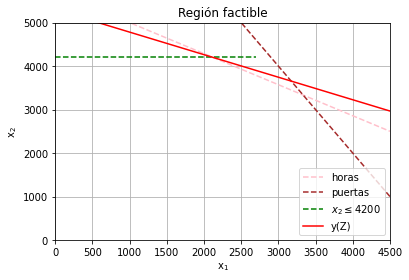

26516000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(60000-7.5*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=4200, xmin=0.0, xmax=0.6,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=2120
x2=4200
Z = 2800*x1 + 5400*x2-500000-1600000
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (500000+1600000-2800*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4500)
plt.ylim(0,5000)
plt.legend(['horas','puertas','$x_2\leq 4200$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

Finalmente, con todas las restricciones y el aumento de horas, publicidad, tiempo de producción, demanda y precios menores, nos dejan con una ganancia máxima de z=\$26,516,000, construyendo 2120 thrillseekers y 4200 classy cruisers.

**ES IMPORTANTE RESALTAR QUE EL MÉTODO ES GRÁFICO Y SE RESTRINGE UN POCO A LA VISTA DEL PROGRAMADOR POR LO QUE PODRÍA TENER PEQUEÑAS VARIACIONES CON LOS VALORES REALES, SIN EMMBARGO, PODEMOS COMBROBAR CON LINPROG**

# Método Algebráico (Método Simplex)

El Método Simplex es un método analítico de solución de problemas de programación lineal, capaz de resolver modelos más complejos que los resueltos mediante el método gráfico, sin restricción en el número de variables y con una mayor capacidad de análisis de sensibilidad.

El Método Simplex es un método iterativo que permite ir mejorando la solución en cada paso. La razón matemática de esta mejora radica en que el método consiste en caminar del vértice de un poliedro a un vértice vecino de manera que aumente o disminuya (según el contexto de la función objetivo, sea maximizar o minimizar). Dado que el número de vértices que presenta un poliedro solución es finito, en la medida en que se pueda satisfacer el conjunto de restricciones, siempre se hallará como mínimo una solución óptima.

El método simplex explicado gráficamente hace lo siguiente:
1. Comenzamos evaluando la función objetivo en el valor mas bajo posible (si vamos a maximizar) o en el mas alto (si vamos a minimizar).
2. Analizamos hacia donde crece  mas (o decrece según sea el caso) la función objetivo y aumentamos esa variable hasta el próximo vértice.
3. Evaluamos de nuevo la función objetivo y repetimos el proceso.
4. El método termina en el vértice donde ya no puede crecer o disminuir mas la función objetivo según sea el caso.

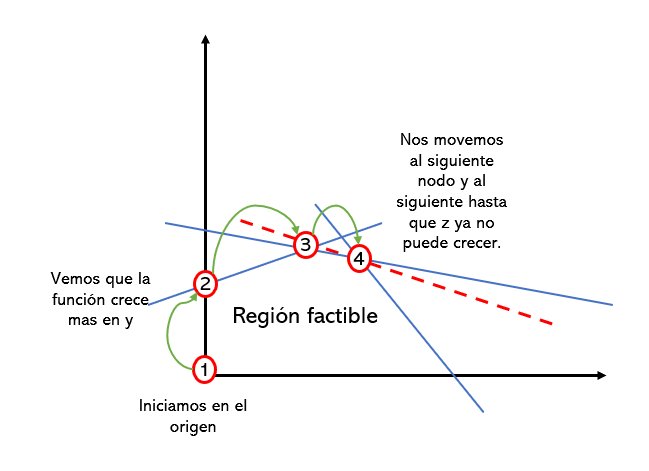

El Método Simplex trabaja basándose en ecuaciones, pero las restricciones iniciales que se modelan mediante programación lineal no son ecuaciones. Hay que convertir estas inecuaciones en ecuaciones utilizando unas variables denominadas de holgura, relacionadas con el recurso al cual hace referencia la restricción.

Es importante notar que las variables de holgura se agregan a las inecuaciones formando una matriz identidad. Por ejemplo:

Supongamos que tenemos el siguiente set de restricciones:
$$3x_1+2x_2-x_3\leq 10$$
$$x_1-2x_2+8x_3\leq 31$$
$$0x_1+x_2+4x_3\leq 18$$
A cada inecuación se le debe agregar una variable de holgura distinta, es por ello que el sistema quedará como sigue
$$3x_1+2x_2-x_3+x_4 = 10$$
$$x_1-2x_2+8x_3+x_5 = 31$$
$$0x_1+x_2+4x_3+x_6 = 18$$
 con $x4,\; x_5 \;y\; x_6$ las variables de holgura.

 Basta reescribir el sistema para notar que se agrega una matriz identidad
$$3x_1+2x_2-x_3+x_4+0x_5+0x_6 = 10$$
$$x_1-2x_2+8x_3+0x_4+x_5+0x_6 = 31$$
$$0x_1+x_2+4x_3+0x_4+0x_5+x_6  = 18$$

Una vez que se tiene este sistema ya se puede trabajar el método simplex con las ecuaciones. Se debe seguir el siguiente proceso

1. Delimitar el problema y hacer el modelo.
2. Convertir las inecuaciones en ecuaciones con las variables de holgura, cuidar el resultado positivo.
3. Las variables que no son las de holgura, al inicio se llamarán variables básicas y se deben hacer iguales a cero.
4. Analizamos la función objetivo Z, si puede crecer o disminuir según el caso, elegimos la variable de coeficiente mayor.
5. Reescrbimos las ecuaciones como función de la variable elegida y vemos hasta donde la podemos aumentar usando las condiciones de no negatividad para todas las variables.
6. Al aumentar una variable básica, se convierte en no basica, entonces hacemos operaciones con las ecuaciones de modo que podamos reescribir la función objetivo con puras variables básicas (las que valen 0).
7. Una vez hecho esto, volvemos a repetir de 4-6 hasta que la función objetivo llegue al punto óptimo, es decir que no puede crecer o disminuir más, según sea el caso. Normalmente obtendremos una matriz identidad con las variables que no son las de holgura.

Veamos un **ejemplo:**


Maximizar el siguiente problema:
$$Z=x_1+2x_2$$
sujeto a 
$$x_1+3x_2 \leq 8$$
$$x_1+x_2 \leq 4$$


Primero debemos transformar el problema anterior a uno a resolver con simplex, es decir las inecuaciones hacerlas ecuaciones, para ello introducimos dos variables de holgura. Básicamente solo debemos sumar una variable nueva a las expresiones ya que es un problema de $\leq$.


$$Z=x_1+2x_2$$
$$x_1+3x_2+x_3 = 8$$
$$x_1+x_2 +x_4 = 4$$

Tomamos las variables que no son de holgura y las hacemos variables básicas por lo que $x_1=x_2=0$. Ahora, obtenemos los valores de las variables restantes.

$$Z=0$$
$$x_3=8$$
$$x_4=4$$

La primera solución factible es (0,0,8,4), sin embargo, de la expresión original de $Z$ sabemos que puede crecer, elegimos la variable con la que crece mas rápido que será $x_2$ por su coeficiente mayor. Para ver hasta donde aumentar $x_2$ reescribimos el sistema como función de $x_2$, recordando que $x_1=0$.

$$x_3=8-3x_2\;\; ->\; x_3 \leq 0\;\; \therefore x_{2max}=\frac{8}{3}$$
$$x_4=4-x_2\;\; ->\; x_4 \leq 0\;\; \therefore x_{2max}=4$$

Tenemos que tomar el menor valor de $x_2$ para respetar las restricciones, por lo tanto, $x_2=\frac{8}{3}$. Tenemos $x_1=0$ y $x_2=8/3$, resolvemos el sistema de nuevo.
$$Z=x_1+2x_2\;->\; Z=\frac
{16}{3}$$
$$x_1+3x_2+x_3 = 8 \;->\; x_3=0$$
$$x_1+x_2 +x_4 = 4\;->\; x_4=\frac{4}{3}$$
Tenemos una nueva variable básica que es $x_3$, porque vale 0, ahora hay que reescribir el sistema de modo que $Z$ contenga solo variables básicas y las demás expresiones solo una variable no básica, en pocas palabras, hay que quitar la variable que se aumentó y dejó de ser básica.
$$Z-x_1-2x_2=0\;\;sumar\; 2equ_2$$
$$x_1+3x_2+x_3 = 8 \;paso\;1\;dividir\;por\; 3$$
$$x_1+x_2 +x_4 = 4 \;\;restar\; equ_2 $$

Primero se divide la ecuación de la nueva variable básica para que su coeficiente sea 1, luego se opera con ella como se indicó anterirormente. El sistema resultante es:

$$Z-\frac{1}{3}x_1+\frac{2}{3}x_3=\frac{16}{3}$$
$$\frac{1}{3}x_1+x_2+\frac{1}{2}x_3 = \frac{8}{3}$$
$$\frac{2}{3}x_1-\frac{1}{3}x_3 +x_4 = \frac{4}{3}$$
Reecribimos $Z$
$$Z=\frac{1}{3}x_1-\frac{2}{3}x_3+\frac{16}{3}$$
notamos que $Z$ aun puede crecer si aumentamos el valor de $x_1$. Repetimos el procedimiento anterior, pero ahora para aumentar $x_1$


$$x_2=\frac{8}{3}-\frac{1}{3} x_1\;\; ->\; x_2 \leq 0\;\; \therefore x_{1max}=8$$
$$x_4=\frac{4}{3}-\frac{2}{3}x_1\;\; ->\; x_4 \leq 0\;\; \therefore x_{1max}=2$$

Entonces nos quedamos con $x_1=2$  y resolvemos el nuevo sistema.
$$Z=\frac{1}{3}x_1-\frac{2}{3}x_3+\frac{16}{3}\;->\; Z=6$$
$$\frac{1}{3}x_1+x_2+\frac{1}{2}x_3 = \frac{8}{3}\;->\; x_2=2$$
$$\frac{2}{3}x_1-\frac{1}{3}x_3 +x_4 = \frac{4}{3}\;->\; x_3=0$$

Operamos con el sistema para quitar $x_1$ de $Z$.

- $\frac{2}{3}x_1-\frac{1}{3}x_3 +x_4 = \frac{4}{3}$ multiplicar por $3/2$
- $Z-\frac{1}{3}x_1+\frac{2}{3}x_3=-\frac{16}{3}$ sumar la ecuación resultante anterior $1/3$ veces.
- $\frac{1}{3}x_1+x_2+\frac{1}{2}x_3 = \frac{8}{3}$ restar el resultado del primer punto $1/3$ veces.

El sistema resultante es:

$$Z+\frac{1}{2}x_3+\frac{1}{2}x_4=6$$
$$x_2+\frac{1}{2}x_3-\frac{1}{2}x_4 = 2$$
$$x_1-\frac{1}{2}x_3 +\frac{3}{2}x_4 = 2$$
Despejamos $Z$
$$Z=-\frac{1}{2}x_3-\frac{1}{2}x_4+6$$
vemos que ya no se puede aumentar $Z$, por lo tanto tenemos la solución óptima con $x_3=x_4=0$ y $x_1=x_2=2$, el valor máximo es $Z=6$

**Problemas del método simplex:**

[Problemas a mano, click aqui](https://drive.google.com/file/d/1Caw5VR15qMf1UfGGR6OUlUicCSfPIYXg/view?usp=sharing)

**Problema 1**


maximizar
$$Z=x_1+2x_2$$
sujeto a
$$x_1+3x_2\leq 20$$
$$x_1+x_2\leq10$$
$$2x_1+x_2\leq16$$

Las ecuaciones son obtenidas facilmente de la gráfica.

**Siempre que no se pongan restricciones para las variables de decisión, en este documento, debe asumirse que son mayores a 0.**

In [ ]:
A = np.array([[1, 3], [1, 1], [2, 1]]) #Arreglo de coeficientes de restricciones 
b = np.array([20, 10, 16])               #Arreglo de resultados de restricciones
c = np.array([1, 2])                       #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b,bounds=(0, None), method='simplex') #El -c es pa maximizar
print('Z óptimo:', -res.fun, '\nX:', res.x) #El valor optimo resulta negativo, lo corregimos y listo

Z óptimo: 15.0 
X: [5. 5.]


**Problema 2**


maximizar
$$Z=x_1+2x_2$$
sujeto a
$$x_1+3x_2\leq 8$$
$$x_1+x_2\leq4$$



In [ ]:
A = np.array([[1, 3], [1, 1]]) #Arreglo de coeficientes de restricciones 
b = np.array([8, 4])               #Arreglo de resultados de restricciones
c = np.array([1, 2])                       #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b,bounds=(0, None), method='simplex') #El -c es pa maximizar
print('Z óptimo:', -res.fun, '\nX:', res.x) #El valor optimo resulta negativo, lo corregimos y listo

Z óptimo: 6.0 
X: [2. 2.]


**Problema 3**


maximizar
$$Z=2x_1+3x_2$$
sujeto a
$$-3x_1+x_2\leq 1$$
$$4x_1+2x_2\leq20$$
$$4x_1-x_2\leq 10$$
$$-x_1+2x_2\leq 5$$


In [ ]:
A = np.array([[-3, 1], [4, 2], [4, -1],[-1, 2]]) #Arreglo de coeficientes de restricciones 
b = np.array([1, 20, 10, 5])               #Arreglo de resultados de restricciones
c = np.array([2, 3])                       #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b,bounds=(0, None), method='simplex') #El -c es pa maximizar
print('Z óptimo:', -res.fun, '\nX:', res.x) #El valor optimo resulta negativo, lo corregimos y listo

Z óptimo: 18.0 
X: [3. 4.]


**Problema 4**


maximizar
$$Z=5x_1+7x_2$$
sujeto a
$$2x_1+3x_2\leq 147$$
$$3x_1+4x_2\leq210$$
$$x_1+x_2\leq63$$


In [ ]:
A = np.array([[2, 3], [3, 4], [1, 1]]) #Arreglo de coeficientes de restricciones 
b = np.array([147, 210, 63])               #Arreglo de resultados de restricciones
c = np.array([5, 7])                       #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b,bounds=(0, None), method='simplex') #El -c es pa maximizar
print('Z óptimo:', -res.fun, '\nX:', res.x) #El valor optimo resulta negativo, lo corregimos y listo

Z óptimo: 357.0 
X: [42. 21.]


**Problema 5**


maximizar
$$Z=4x_1+3x_2+6x_3$$
sujeto a
$$3x_1+x_2+3x_3\leq 30$$
$$2x_1+2x_2+3x_3\leq40$$



In [ ]:
A = np.array([[3, 1, 3], [2, 2, 3]]) #Arreglo de coeficientes de restricciones 
b = np.array([30, 40])               #Arreglo de resultados de restricciones
c = np.array([4, 3, 6])                       #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b,bounds=(0, None), method='simplex') #El -c es pa maximizar
print('Z óptimo:', -res.fun, '\nX:', res.x) #El valor optimo resulta negativo, lo corregimos y listo

Z óptimo: 70.0 
X: [ 0.         10.          6.66666667]


**Problema 6**


maximizar
$$Z=3x_1+4x_2+5x_3$$
sujeto a
$$3x_1+x_2+5x_3\leq 150$$
$$x_1+4x_2+x_3\leq120$$
$$2x_1+2x_3\leq105$$


In [ ]:
A = np.array([[3, 1, 5], [1, 4, 1], [2, 0, 2]]) #Arreglo de -coeficientes de restricciones 
b = np.array([150, 120, 105])               #Arreglo de -resultados de restricciones
c = np.array([3, 4, 5])                       #Arreglo de -coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b,bounds=(0, None), method='simplex') #El -c es pa maximizar
print('Z óptimo:', -res.fun, '\nX:', res.x) #El valor optimo resulta negativo, lo corregimos y listo

Z óptimo: 221.0526315789474 
X: [ 0.         23.68421053 25.26315789]


Todos los valores coinciden, en los ejercicios a mano como algunos se hicieron gráficamente, hay pequeñas variaciones pues las gráficas a mano no fueron tan precisas, sin embargo el proceso del método simplex es lo que importa en esos casos y se muestra bastante claro.

# Método Simplex tabular 

La manera algebráica de resolver el método, aunque efectiva es bastante tediosa y se presta a confusión, es por ello que existe el método simplex tabular, en el que no se necesita nada mas que representar las ecuaciones en forma matricial en una tabla similar a esta:

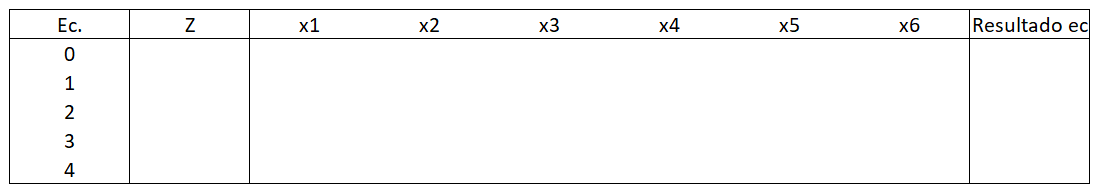


Existen casos especiales en el método simplex en los cuales las regiones factibles no se encuentran acotadas.

**Ahora veamos algunos ejemplos**


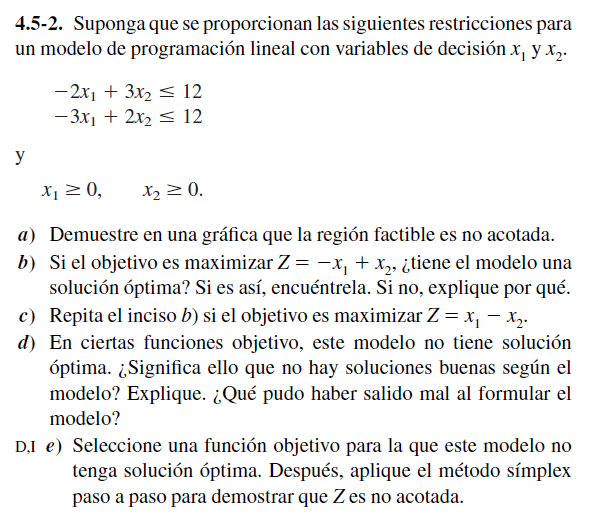


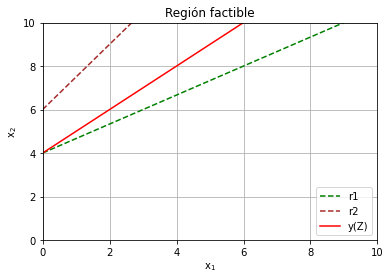

4


In [ ]:

x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(12+2*x)/3
u=(12+3*x)/2

plt.plot(x,w,c='green',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=0
x2=4
Z = -x1 + x2
#Ecuacion a graficar 

def y(x):
  return (x + Z)
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend(['r1','r2','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)


a) Podemos ver una región no acotada






Para el inciso b) tenemos 
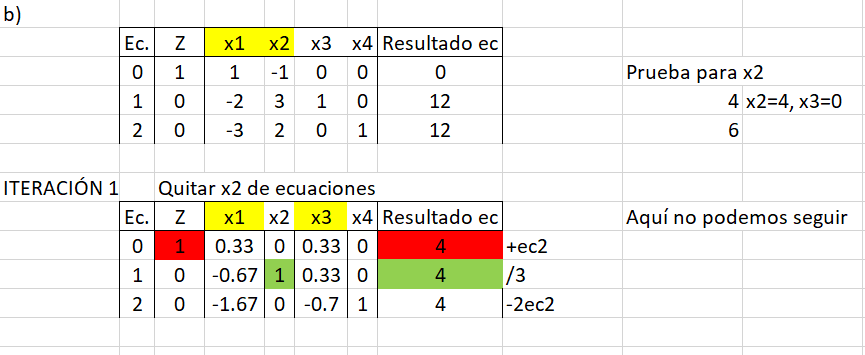



b) La óptima es (0,4) con Z=4

Para el inciso c) hacemos el método tabular y la gráfica.

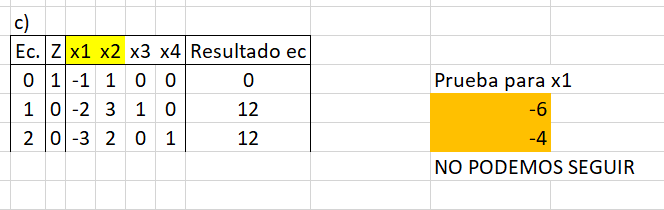

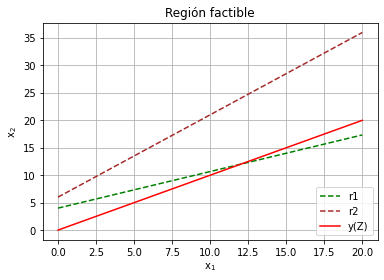

0


In [ ]:
x=np.arange(0,20,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(12+2*x)/3
u=(12+3*x)/2

plt.plot(x,w,c='green',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=0
x2=0
Z = x1 - x2
#Ecuacion a graficar 

def y(x):
  return (x  -Z)
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
#plt.xlim(0,10)
#plt.ylim(0,10)
plt.legend(['r1','r2','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

c) Como podemos ver en el gráfico anterior, debido a la expresión para Z, no hay un valor óptimo ya que Z va a infinito. Debido a que nos podemos mover sin reestricción por r1

d) En este caso, que exista una solución "buena" dependerá de mi función objetivo y las reestricciones.

Probablemente el modelo se formuló mal en el momento de poner las condiciones ya que una contiene a la otra, es decir, la condición 2 no contribuye en nada.
Viendo la gráfica con r1 y r2, podemos subir r1 o bajar r2 de modo que exista un vertice para simplex, o bien variar la pendiente para poder hacer una región acotada, lo que es la opción mas correcta por decirlo de un modo.


e)Observemos la siguiente gráfica con la función objetivo $$Z = x1 - x2$$

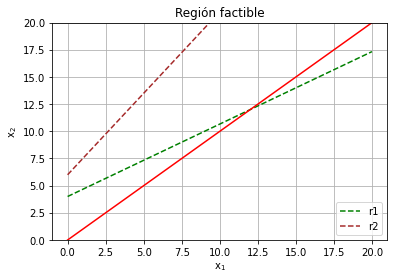

0


In [ ]:
x=np.arange(0,20,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(12+2*x)/3
u=(12+3*x)/2

plt.plot(x,w,c='green',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=0
x2=0
Z = x1 - x2
#Ecuacion a graficar 

def y(x):
  return (x  -Z)
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
#plt.xlim(0,10)
plt.ylim(0,20)
plt.legend(['r1','r2'],loc='lower right')
plt.grid()
plt.show()
print(Z)

1. Para el paso uno, evaluaremos el nodo (0,0), que es el resultado de la gráfica anterior, luego por la función objetivo, decidiremos aumentar x1.
2. Después podemos ver que no existe otro nodo sobre el eje de las abscisas, por lo que el método simplex tomará básicamente $x_1=\infty$ en búsqueda de una intersección. Eso demuestra que la función objetivo es no acotada.

f) Ahora usando linprog

In [ ]:
A = np.array([[-2,3],                                #Arreglo de coeficientes de restricciones (para mayor o igual, *-1)
              [-3,2]]) 
b = np.array([12,12])                              #Arreglo de resultados de restricciones
c = np.array([1,-1])                                          #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', -res.fun, '\nX:', res.x)                             #El valor optimo en este caso es un mínimo

Z óptimo: -4.0 
X: [0. 4.]


Podemos ver que se obtiene una solución negativa en Z ya que en ese punto hay un nodo, sin embargo, el hecho de que Z sea menor que 0, no es correcto.

Cuando linprog encuentra un valor no acotado termina la iteración, entonces no avanza en x1 y se pasa a iterar con x2, llega al nodo (0,4) y nuevamente tenemos x1 no acotada, pero ya no podemos mover x2 así que linprog termina el proceso y arroja el último valor de Z.


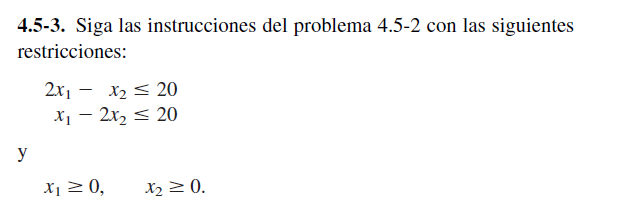

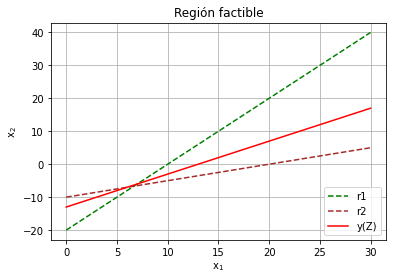

-13


In [ ]:
x=np.arange(0,30,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=-(20-2*x)
u=-(20-x)/2

plt.plot(x,w,c='green',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=6
x2=-7
Z = -x1 + x2
#Ecuacion a graficar 

def y(x):
  return (x + Z)
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
#plt.xlim(0,10)
#plt.ylim(0,10)
plt.legend(['r1','r2','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

a) Vemos una región no acotada, es decir un áarea no definida entre los ejes y las restricciones.


Para el inciso b, hacemos lo siguiente 
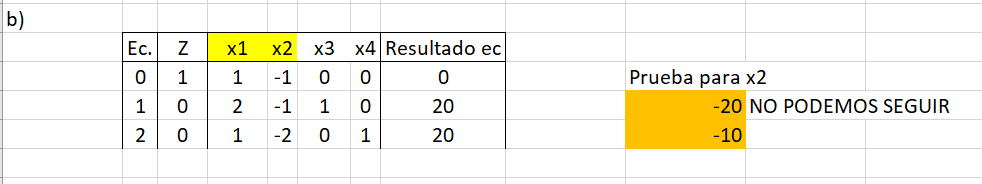
b) Según el método tabular no tendremos solución óptima, pero de la gráfica el valor mayor de Z es negativo $Z=-13$, no sirve, por ello nos quedamos en (0,0) y decimos que no es acotado.

Para el inciso C


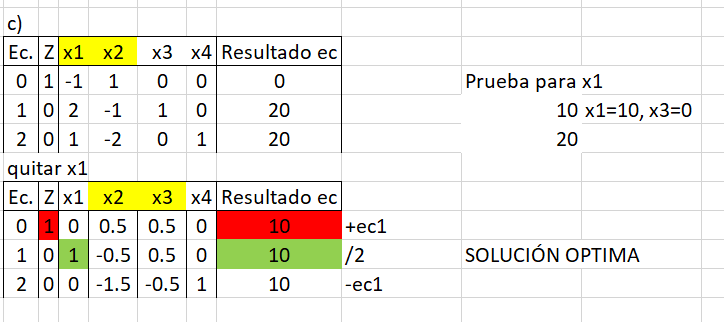


 tenemos pues (10,0) con Z= 10

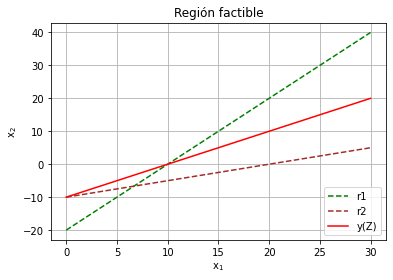

10


In [ ]:
x=np.arange(0,30,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(-20+2*x)
u=(-20+x)/2

plt.plot(x,w,c='green',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=10
x2=0
Z = x1 - x2
#Ecuacion a graficar 

def y(x):
  return (x - Z)
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
#plt.xlim(0,10)
#plt.ylim(0,10)
plt.legend(['r1','r2','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)



c)Aquí no hay solución óptima ya que podemos aumentar x1 cuantas veces queramos aumentando así Z. Es interesante notar de la gráfica como simplex falla debido a que las condiciones de no negatividad hacen que no pasemos debajo del 0, lo que hace que la supuesta solución óptima no esté dentro de las restricciones.

d)Es el mismo problema que el ejercicio anterior, podría modificarse un poco las restricciones de modo que su interseción quede sobre el eje x, es decir que empiecen sobre el 0 para que simplex se mueva por los vértices dentro de la región. Del mismo modo modificar la pendiente de alguna restricción para obtener una región acotada o agregar una tercera restrcción.

e) Podemos ver la siguiente gráfica

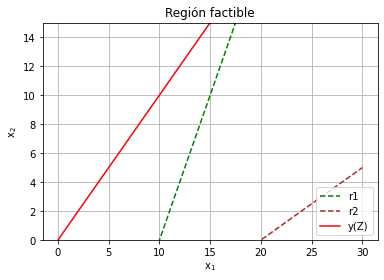

0


In [ ]:
x=np.arange(0,30,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=-(20-2*x)
u=-(20-x)/2

plt.plot(x,w,c='green',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=0
x2=0
Z = x1 - x2
#Ecuacion a graficar 

def y(x):
  return (x - Z)
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
#plt.xlim(0,10)
plt.ylim(0,15)
plt.legend(['r1','r2','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

1. El método empieza en 0,0 luego decide aumentar x1.
2. Aqui llegaremos a la intersección 0,10, por ser la primera intersección, luego al no estar acotada la variable x2 el métdo parará.


f) Usamos ahora linprog

In [ ]:
A = np.array([[2,-1],                                #Arreglo de coeficientes de restricciones (para mayor o igual, *-1)
              [1,-2]]) 
b = np.array([20,20])                              #Arreglo de resultados de restricciones
c = np.array([1,-1])                                          #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', -res.fun, '\nX:', res.x)                             #El valor optimo en este caso es un mínimo

Z óptimo: 10.0 
X: [10.  0.]


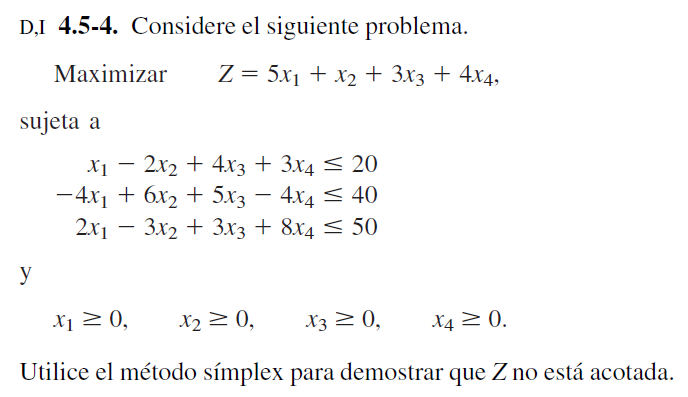

Hacemos el método tabular como sigue

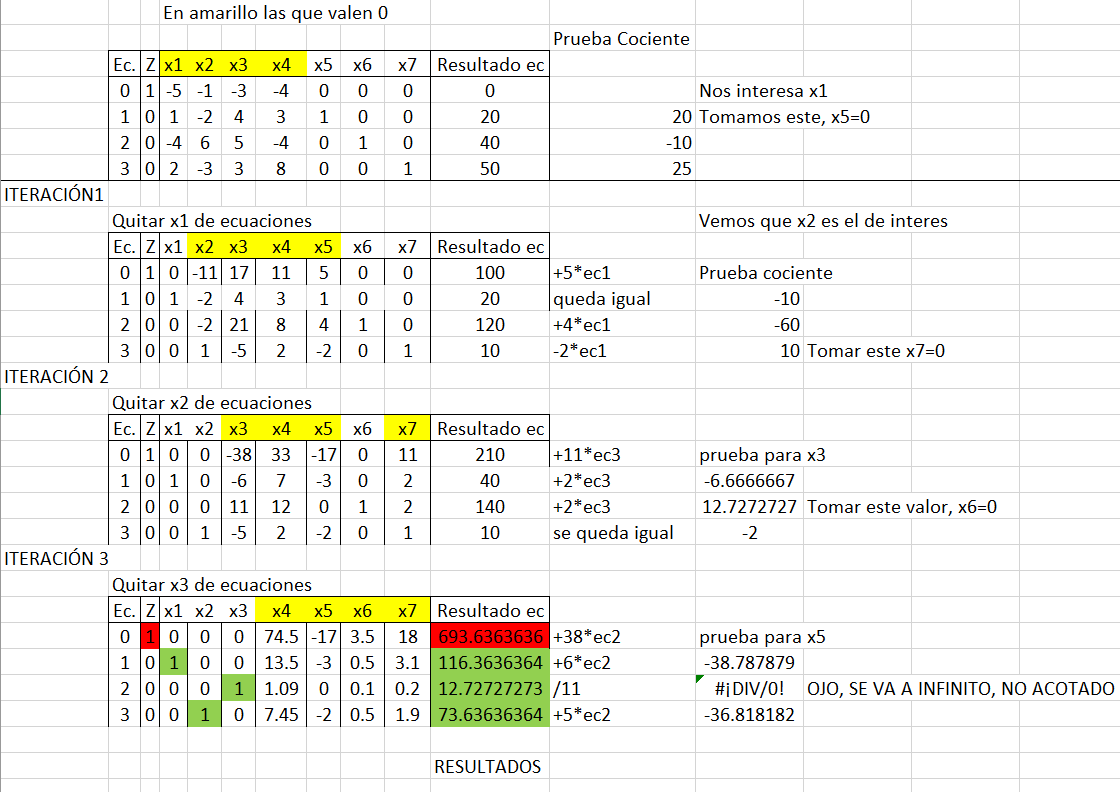

Obtenemos que el sistema es no acotado y la iteración para en (116.34, 73.63, 12.7272, 0), con Z= 693.63

In [ ]:
#Comprobación con linprog
A = np.array([[1,-2,4,3],                                #Arreglo de coeficientes de restricciones (para mayor o igual, *-1)
              [-4,6,5,-4],
              [2,-3,3,8 ]]) 
b = np.array([20,40,50])                              #Arreglo de resultados de restricciones
c = np.array([5,1,3,4])                                          #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', -res.fun, '\nX:', res.x)                             #El valor optimo en este caso es un mínimo

Z óptimo: 693.6363636363637 
X: [116.36363636  73.63636364  12.72727273   0.        ]


# Método Simplex usando linprog
 Linprog es una función de la biblioteca scipy.optimize de python que nos permite utilizar varios métodos de optimización para el problema que estemos buscando. En este caso nosotros utilizamos el método simplex implementado con linprog.

 La documentación está disponible en:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html


**Veamos como ejemplo las soluciones de los ejercicios con el método gráfico**



---

Caso 3.1 \\
Automobile Alliance, una gran compañía manufacturera de
automóviles, organiza los vehículos que fabrica en tres familias:
camiones, automóviles pequeños y una familia de autos
medianos y de lujo. Una planta fuera de Detroit, MI, ensambla
dos modelos de la familia de autos medianos y de lujo. El primer
modelo, el Thrillseeker, es un sedán cuatro puertas con
asientos de vinil, interiores de plástico, características estándar
y un excelente rendimiento. Se promociona como una buena
compra para familias de clase media con presupuestos reducidos.
Cada Thrillseeker que se vende genera una ganancia
modesta de \$3 600 para la compañía. El segundo modelo, el
Classy Cruiser, es un sedán de lujo de dos puertas con asientos
de piel, interiores de madera, características personalizadas y
gran capacidad de navegación. Se vende como un símbolo de
opulencia a familias de clase media-alta y cada uno genera una
buena ganancia de \$5,400. 

Rachel Rosencrantz, gerente de la planta de ensamblado,
debe decidir el programa de producción del próximo mes. En
especial, debe determinar cuántos Thrillseekers y cuántos Classy
Cruisers se tienen que ensamblar en la planta para maximizar
la ganancia de la compañía. Sabe que la planta tiene una capacidad
de 48,000 horas de mano de obra al mes. También, que
para ensamblar un Thrillseeker se emplean 6 horas-hombre y
un Cruise Classy 10.5 horas-hombre. 

Debido a que en la planta sólo se ensambla, las partes que
se requieren para los dos modelos no se producen en ella. En su
lugar, se envían de otras plantas ubicadas en el área de Michigan.
Por ejemplo, llantas, volantes, ventanas, asientos y puertas
llegan de varias plantas proveedoras. Para el próximo mes,
Rachel sabe que podrá obtener sólo 20,000 puertas (10,000 izquierdas
y 10 000 derechas) del proveedor de ellas. Una huelga
de trabajadores forzó el cierre de esa fábrica durante varios
días, y no podrá cumplir con su programa de producción para
el siguiente mes. Tanto el Thrillseeker como el Classy Cruiser
usan la misma puerta. 

Además, un pronóstico reciente de la compañía sobre la
demanda del mes de los diferentes modelos sugiere que la venta
del Classy Cruiser se limitaría a 3,500 autos. No existe un tope
a la demanda del Thrillseeker dentro de los límites de capacidad
de la planta de ensamblado.

**a)** Formule y resuelva un problema de programación lineal para
determinar el número de autos Thrillseeker y Classy Cruiser que
deben ensamblarse.

El problema se puede resumir en la siguiente tabla 
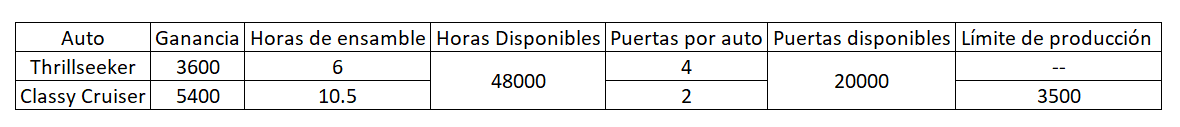




Entonces tenemos el siguiente problema:
$$Z=3600x_1+5400x_2$$
Sujeto a las siguientes condiciones 
$$x_2\leq 3500$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 6x_1+10.5x_2\leq 48000$$
$x_1$ y $x_2$ son mayores o iguales a cero.

La solución es la siguente.

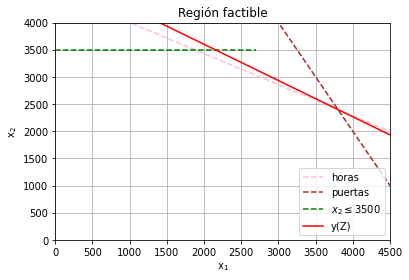

26640000


In [ ]:
#Método Gráfico de programación lineal IO


x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(48000-6*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=3500, xmin=0.0, xmax=0.6,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=3800
x2=2400
Z = 3600*x1 + 5400*x2
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (-3600*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4500)
plt.ylim(0,4000)
plt.legend(['horas','puertas','$x_2\leq 3500$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

Es importante hacer un zoom a las regiones factibles tal como en la gráfica anterior para poder probar valores con mas exactitud.
Finalmente tenemos una ganancia de \$26,640,000 con 3800 del Thrilseeker y 2400 del Classy Cruise.

In [ ]:
#Comprobación con linprog
A = np.array([[0,1],                                #Arreglo de coeficientes de restricciones (para mayor o igual, *-1)
              [4,2],
              [6,10.5]]) 
b = np.array([3500,20000,48000])                              #Arreglo de resultados de restricciones
c = np.array([3600,5400])                                          #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', -res.fun, '\nX:', res.x)                             #El valor optimo en este caso es un mínimo

Z óptimo: 26640000.0 
X: [3800. 2400.]


---
Antes de tomar las decisiones de producción finales, Rachel
planea explorar los siguientes aspectos por separado, excepto
donde se indique otra cosa.

**b)** El departamento de marketing sabe que puede intentar una campaña
de publicidad de $500,000 que elevará la demanda del Classy
Cruiser 20% el próximo mes. ¿Debe realizarse la campaña?

La campaña de publicidad tiene para un mes un costo de \$500000, lo que modifica Z, además una restricción se modifica aumentando los 3500 cruiser un 20\%, por lo que ahora se piden 4200.
El problema queda entonces 
$$Z=3600x_1+5400x_2-500000$$
Sujeto a las siguientes condiciones 
$$x_2\leq 4200$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 6x_1+10.5x_2\leq 48000$$
$x_1$ y $x_2$ son mayores o iguales a cero.
Entonces, la solución será

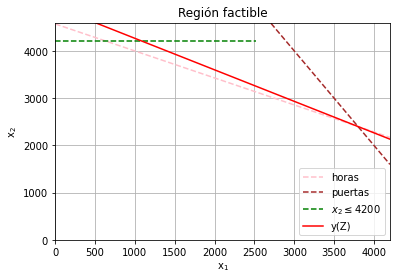

26140000


In [ ]:
#Método Gráfico de programación lineal IO
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(48000-6*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=4200, xmin=0.0, xmax=0.6,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=3800
x2=2400
Z = 3600*x1 + 5400*x2 - 500000
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (500000-3600*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4200)
plt.ylim(0,4600)
plt.legend(['horas','puertas','$x_2\leq 4200$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

tenemos una ganancia de \$26,140,000 con 3800 del Thrilseeker y 2400 del Classy Cruise. Es una ganancia menor ya que la nueva restricción no afecta en nada así que no es buena idea hacer el gasto de \$500,000

In [ ]:
#Comprobación con linprog
A = np.array([[0,1],                                #Arreglo de coeficientes de restricciones (para mayor o igual, *-1)
              [4,2],
              [6,10.5]]) 
b = np.array([4200,20000,48000])                              #Arreglo de resultados de restricciones
c = np.array([3600,5400])                                          #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', -res.fun-500000, '\nX:', res.x)                             #El valor optimo en este caso es un mínimo

Z óptimo: 26140000.0 
X: [3800. 2400.]


---
**c)** Rachel sabe que puede aumentar la capacidad de producción
de la planta el próximo mes si usa tiempo extra. El incremento
de horas-hombre puede ser de 25%. Con la nueva capacidad,
¿cuántos modelos Thrillseeker y cuántos Classy Cruiser deben
ensamblarse?

La restricción que cambia ahora es la de las horas de producción por lo que de 48,000 pasaremos a 60,000.
El problema queda 
$$Z=3600x_1+5400x_2$$
Sujeto a las siguientes condiciones 
$$x_2\leq 3500$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 6x_1+10.5x_2\leq 60000$$
$x_1$ y $x_2$ son mayores o iguales a cero.
La solución queda


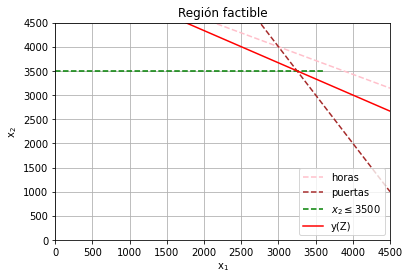

30600000


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(60000-6*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=3500, xmin=0.0, xmax=0.8,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=3250
x2=3500
Z = 3600*x1 + 5400*x2
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (-3600*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4500)
plt.ylim(0,4500)
plt.legend(['horas','puertas','$x_2\leq 3500$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

Tenemos una ganancia de \$30,600,000 por lo que si es bueno aumentar las horas de producción, pero al ver el gráfico vemos que la linea rosa puede descender un poco, así que podemos aumnetar menos horas con la misma ganancia. $x_1=3250$ y $x_2=3500$

In [ ]:
#Comprobación con linprog
A = np.array([[0,1],                                #Arreglo de coeficientes de restricciones (para mayor o igual, *-1)
              [4,2],
              [6,10.5]]) 
b = np.array([3500,20000,60000])                              #Arreglo de resultados de restricciones
c = np.array([3600,5400])                                          #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', -res.fun, '\nX:', res.x)                             #El valor optimo en este caso es un mínimo

Z óptimo: 30600000.0 
X: [3250. 3500.]





---



**d)** Rachel sabe que el tiempo extra genera un costo adicional. ¿Cuál
es la máxima cantidad que debe estar dispuesta a pagar por todo
el tiempo extra adicional al costo del tiempo normal? Exprese su
respuesta como una sola suma.

En el caso original teníamos Z=\$26,640,000 ahora tenemos Z=\$30,600,000 por lo que a lo más debería poder gastar la diferencia, claro quepara que sea facible debería ser algo menor, la diferencia es de $3,960,000.


---
**e)** Rachel estudia la opción de usar tanto la campaña de publicidad
como las horas de tiempo extra. La campaña eleva 20%
la demanda del Classy Cruiser y el tiempo extra aumenta
25% la capacidad de la planta. ¿Cuántos modelos Thrillseeker y
cuántos Classy Cruiser deben ensamblarse con la campaña publicitaria
y las horas extra si cada Classy Cruiser que se venda
mantendrá su contribución de 50% más que la venta de un Thrillseeker?

Combinando las nuevas restricciones el problma será el siguiente
$$Z=3600x_1+5400x_2$$
Sujeto a las siguientes condiciones 
$$x_2\leq 4200$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 6x_1+10.5x_2\leq 60000$$
$x_1$ y $x_2$ son mayores o iguales a cero.

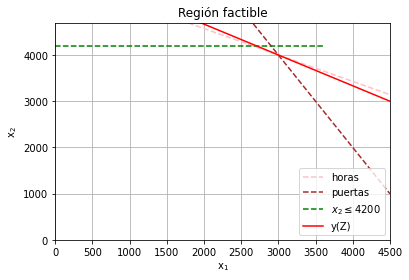

32400000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(60000-6*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=4200, xmin=0.0, xmax=0.8,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=3000
x2=4000
Z = 3600*x1 + 5400*x2
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (-3600*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4500)
plt.ylim(0,4700)
plt.legend(['horas','puertas','$x_2\leq 4200$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

Tenemos una ganancia de \$32,400,000 con $x_1=3000$ y $x_2=4000$.

In [ ]:
#Comprobación con linprog
A = np.array([[0,1],                                #Arreglo de coeficientes de restricciones (para mayor o igual, *-1)
              [4,2],
              [6,10.5]]) 
b = np.array([4200,20000,60000])                              #Arreglo de resultados de restricciones
c = np.array([3600,5400])                                          #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', -res.fun, '\nX:', res.x)                             #El valor optimo en este caso es un mínimo

Z óptimo: 32400000.0 
X: [3000. 4000.]


---
**f)** Si se sabe que la campaña de publicidad cuesta \$500,000 y el uso
máximo de horas-trabajo de tiempo extra cuesta  1,600,000 más
que el tiempo normal, la solución que se encontró en el inciso e)
¿es adecuada comparada con la solución del inciso a)?

Solo queda restar los costos a la ganancia obtenida
$$ Z_{neta}=32400000-500000-1600000=30300000$$
nos queda una ganacia de \$30,300,000 lo que es considerablemente mayo que en el inciso a) así que es conveniente usar esta opción.

---
**g)** Automobile Alliance ha determinado que, en realidad, los distribuidores
hacen grandes descuentos al precio del Thrillseeker
para sacarlo del lote. Por un acuerdo de ganancias compartidas
con ellos, la compañía no obtendrá la ganancia de \$3,600 en el
Thrillseeker sino que ganará sólo 2,800. Determine el número
de autos Thrillseeker y de Classy Cruiser que deben ensamblarse
dado este nuevo precio con descuento.

Tomando el ejercicio original, el problema ahora va como 
$$Z=2800x_1+5400x_2$$
Sujeto a las siguientes condiciones 
$$x_2\leq 3500$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 6x_1+10.5x_2\leq 48000$$
$x_1$ y $x_2$ son mayores o iguales a cero.



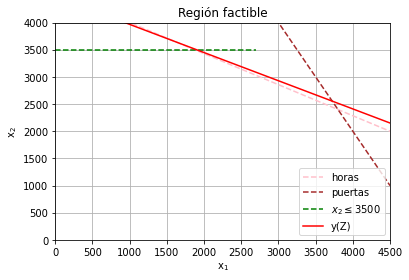

24220000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(48000-6*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=3500, xmin=0.0, xmax=0.6,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=1900
x2=3500
Z = 2800*x1 + 5400*x2
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (-2800*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4500)
plt.ylim(0,4000)
plt.legend(['horas','puertas','$x_2\leq 3500$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

En este caso la ganancia es de \$24,220,000 con $x_1=1900$ y $x_2=3500$

In [ ]:
#Comprobación con linprog
A = np.array([[0,1],                                #Arreglo de coeficientes de restricciones (para mayor o igual, *-1)
              [4,2],
              [6,10.5]]) 
b = np.array([3500,20000,48000])                              #Arreglo de resultados de restricciones
c = np.array([2800,5400])                                          #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', -res.fun, '\nX:', res.x)                             #El valor optimo en este caso es un mínimo

Z óptimo: 24150000.0 
X: [1875. 3500.]


---
**h)** La compañía descubrió problemas de calidad en el Thrillseeker
mediante pruebas aplicadas aleatoriamente a unidades del Thrillseeker
al final de la línea de ensamblado. Los inspectores detectaron
que en más de 60% de los casos, dos de las cuatro puertas
del automóvil no sellaban bien. Como el porcentaje de autos
Thrillseeker defectuosos determinado por el muestreo aleatorio
es tan alto, el supervisor de planta decidió realizar pruebas de
control de calidad a todos los vehículos al final de la línea. Debido
a las pruebas adicionales, el tiempo para ensamblar un auto
aumentó de 6 a 7.5 horas. Determine el número de unidades de
cada modelo que deben ensamblarse dado este nuevo tiempo de
ensamblado.

El nuevo problema quedará como sigue
$$Z=3600x_1+5400x_2$$
Sujeto a las siguientes condiciones 
$$x_2\leq 3500$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 7.5x_1+10.5x_2\leq 48000$$
$x_1$ y $x_2$ son mayores o iguales a cero.



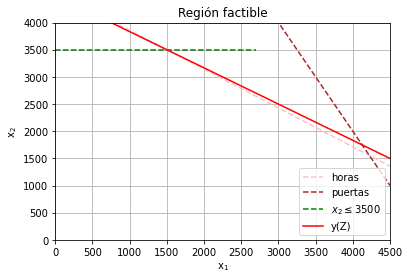

24300000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(48000-7.5*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=3500, xmin=0.0, xmax=0.6,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=1500
x2=3500
Z = 3600*x1 + 5400*x2
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (-3600*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4500)
plt.ylim(0,4000)
plt.legend(['horas','puertas','$x_2\leq 3500$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

En este caso la ganancia es de \$24,300,000 con $x_1=1500$ y $x_2=3500$

In [ ]:
#Comprobación con linprog
A = np.array([[0,1],                                #Arreglo de coeficientes de restricciones (para mayor o igual, *-1)
              [4,2],
              [7.5,10.5]]) 
b = np.array([3500,20000,48000])                              #Arreglo de resultados de restricciones
c = np.array([3600,5400])                                          #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', -res.fun, '\nX:', res.x)                             #El valor optimo en este caso es un mínimo

Z óptimo: 24300000.0 
X: [1500. 3500.]


---
**i)** El consejo directivo de Alliance desea captar un mayor porcentaje
de mercado para el sedán de lujo y quisiera cumplir con
toda la demanda del Classy Cruiser. Por ello, pidieron a Rachel
que determine cuánto disminuiría la ganancia de su planta de
ensamblado comparada con la ganancia del inciso a). Pueden
pedirle que cumpla con toda la demanda de este modelo sólo si
la disminución de la ganancia no supera los \$2,000,000.

Las modificaciones serán las siguientes 
$$Z=3600x_1+5400x_2$$
Sujeto a las siguientes condiciones 
$$x_2= 3500$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 6x_1+10.5x_2\leq 48000$$
$x_1$ y $x_2$ son mayores o iguales a cero.


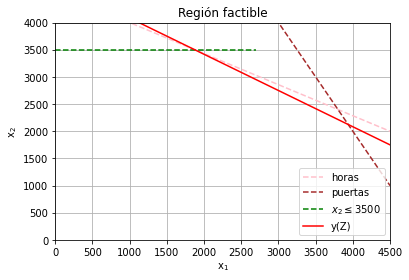

25650000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(48000-6*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=3500, xmin=0.0, xmax=0.6,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=1875
x2=3500
Z = 3600*x1 + 5400*x2
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (-3600*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4500)
plt.ylim(0,4000)
plt.legend(['horas','puertas','$x_2\leq 3500$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

En este caso la ganancia es de \$25,650,000 con $x_1=1875$ y $x_2=3500$, en el caso uno la ganancia era de \$26,640,000, la diferencia es menor a 2,000,000 por lo que es posible cumplir la demanda.

In [ ]:
#Comprobación con linprog
A = np.array([[0,1],                                #Arreglo de coeficientes de restricciones (para mayor o igual, *-1)
              [4,2],
              [6,10.5],
              [0,-1]]) 
b = np.array([3500,20000,48000,-3500])                              #Arreglo de resultados de restricciones
c = np.array([3600,5400])                                          #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', -res.fun, '\nX:', res.x)                             #El valor optimo en este caso es un mínimo

Z óptimo: 25650000.0 
X: [1875. 3500.]


---
**j)** Rachel quiere tomar la decisión final combinando todas las consideraciones
de los incisos f), g) y h). ¿Cuáles son sus decisiones
finales respecto de la campaña publicitaria, las horas extra y el
número de autos Thrillseeker y Classy Cruiser que se deben ensamblar?

El problema combinado por completo es 
$$Z=2800x_1+5400x_2-500000-1600000$$
Sujeto a las siguientes condiciones 
$$x_2\leq 4200$$
$$ 4x_1+2x_2\leq 20000 $$
$$ 7.5x_1+10.5x_2\leq 60000$$
$x_1$ y $x_2$ son mayores o iguales a cero.


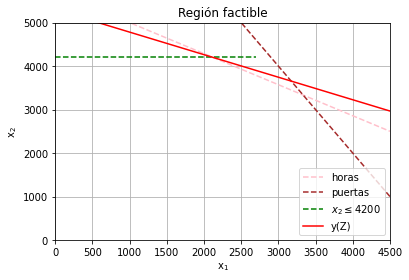

26516000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,20000,0.01)    #OJO CON LOS INTERVALOS
#Graficar restricciones 
w=(60000-7.5*x)/10.5
u=(20000-4*x)/2

plt.plot(x,w,c='pink',linestyle='--')
plt.plot(x,u,c='brown',linestyle='--')
plt.axhline(y=4200, xmin=0.0, xmax=0.6,c='green', linestyle='--')

#Aquí maximizamos Z con prueba y error
#Variables (Se mueven para buscar el máximo)
x1=2120
x2=4200
Z = 2800*x1 + 5400*x2-500000-1600000
#Ecuacion a graficar 

def y(x):
  #Z=26500000
  return (500000+1600000-2800*x + Z)/5400
#Graficamos Z (A maximizar)
plt.plot(x,y(x),'red')

plt.xlabel('x$_1$')
plt.ylabel("x$_2$")
plt.title("Región factible")
plt.xlim(0,4500)
plt.ylim(0,5000)
plt.legend(['horas','puertas','$x_2\leq 4200$','y(Z)'],loc='lower right')
plt.grid()
plt.show()
print(Z)

Finalmente, con todas las restricciones y el aumento de horas, publicidad, tiempo de producción, demanda y precios menores, nos dejan con una ganancia máxima de z=\$26,516,000, construyendo 2120 thrillseekers y 4200 classy cruisers.

In [ ]:
#Comprobación con linprog
A = np.array([[0,1],                                #Arreglo de coeficientes de restricciones (para mayor o igual, *-1)
              [4,2],
              [7.5,10.5]]) 
b = np.array([4200,20000,60000])                              #Arreglo de resultados de restricciones
c = np.array([2800,5400])                                          #Arreglo de coeficientes de z

res = linprog(-c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', -res.fun-500000-1600000, '\nX:', res.x)                             #El valor optimo en este caso es un mínimo

Z óptimo: 26516000.0 
X: [2120. 4200.]


# Algoritmo de Transporte


El modelo trata situaciones de envío de productos de puntos origen a puntos destino. El objetivo es determinar las cantidades óptimas de envío de las fuentes de abastecimiento a las fuentes de consumo que minimicen el costo total del transporte, al mismo tiempo que se satisfagan las condiciones de oferta y demanda.
El algoritmo sigue los mismos pasos del método símplex, es un caso especial, sin embargo se aprovecha la ventaja de la estructura especial del modelo de transporte para organizar los cálculos en una forma mas cómoda. Partimos de la hipótesis de que el modelo está balanceado, es decir que la oferta es igual a la demanda. Si el modelo está desbalanceado se aumentan fuentes ficticias o destinos ficticios para restaurar el equilibrio.

Un problema de transporte se representa gráficamente con una red conformada con nodos de origen y de destino, unidos con las rutas posibles y sus diferentes pesos o costos unitarios de transporte.

Veamos unos ejemplos:

**Ejemplo**

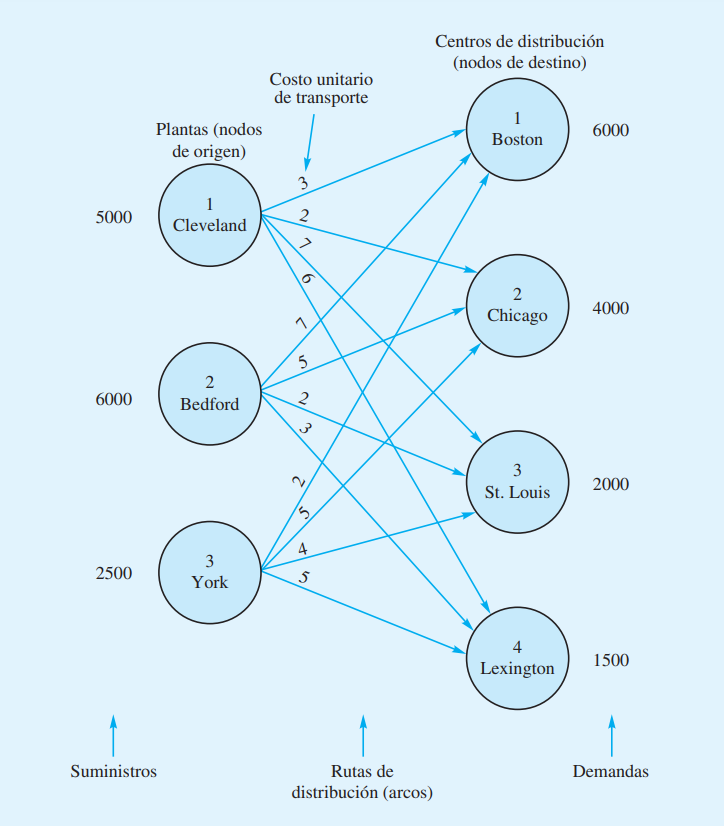


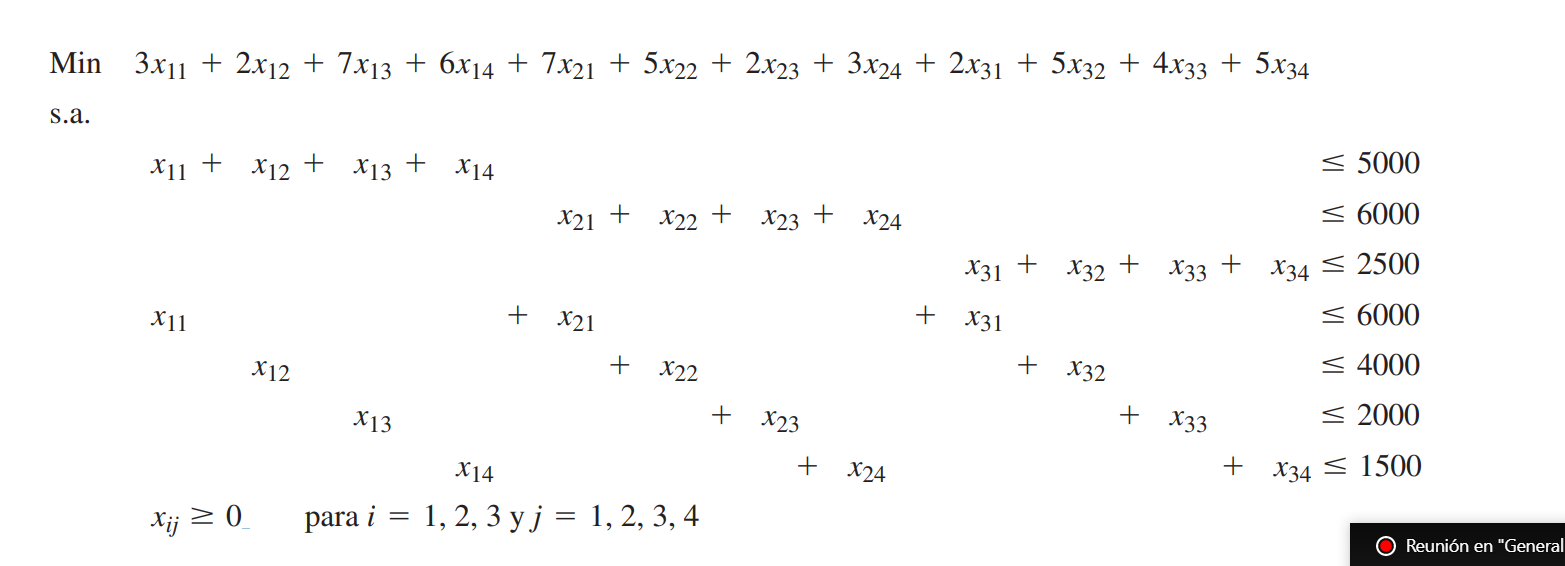



In [ ]:
#con linprog Algoritmo de transporte
A_ub = np.array([[1,1,1,1,0,0,0,0,0,0,0,0],                         #Arreglo de coeficientes de restricciones (para mayor o igual, *-1)
                 [0,0,0,0,1,1,1,1,0,0,0,0],
                 [0,0,0,0,0,0,0,0,1,1,1,1],
                 [1,0,0,0,1,0,0,0,1,0,0,0],
                 [0,1,0,0,0,1,0,0,0,1,0,0],
                 [0,0,1,0,0,0,1,0,0,0,1,0],
                 [0,0,0,1,0,0,0,1,0,0,0,1] ]) 
b_ub = np.array([5000,6000,2500,6000,4000,2000,1500])               #Arreglo de resultados de restricciones
c = np.array([3,2,7,6,7,5,2,3,2,5,4,5])                             #Arreglo de coeficientes de z

res = linprog(c, A_ub, b_ub, bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', res.fun, '\nX:', res.x)                         #El valor optimo en este caso es un mínimo

Z óptimo: 0.0 
X: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Podemos ver que el mínimo gasto es 0, pero claramente sin enviar nada, esto se debe a un problema con la formulación del modelo que se puede corregir facilmente exigiendo que se cubra en su totalidad la demanda de los puntos de distribución, para ello cambiamos las desigualdades  a igualdades.

In [ ]:
#ALGORITMO DE TRANSPORTE
A_ub = np.array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],   #OFERTA
                 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],                      #Arreglos de coeficientes de restricciones (para mayor o igual, *-1)
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]])  
A_eq = np.array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],   #DEMANDA         
                 [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
                 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]]) 
b_ub = np.array([5000, 6000, 2500])
b_eq = np.array([6000, 4000, 2000, 1500])                                     #Arreglo de resultados de restricciones
c =    np.array([3, 2, 7, 6, 7, 5, 2, 3, 2, 5, 4, 5])                         #Arreglo de coeficientes de z, COSTOS DE TRANSPORTE.

res = linprog(c,  A_ub, b_ub,A_eq, b_eq,bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', res.fun, '\nX:', res.x)                                    #El valor optimo en este caso es un mínimo

Z óptimo: 39500.0 
X: [3500. 1500.    0.    0.    0. 2500. 2000. 1500. 2500.    0.    0.    0.]


 **Ejemplo 2**

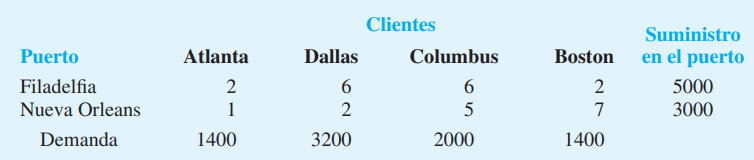

In [ ]:
#OTRO EJEMPLO DE CLASE 
#ALGORITMO DE TRANSPORTE
A_ub = np.array([[1,1,1,1,0,0,0,0],   #OFERTA
                 [0,0,0,0,1,1,1,1]])                       #Arreglos de coeficientes de restricciones (para mayor o igual, *-1)
                 
A_eq = np.array([[1,0,0,0,1,0,0,0],   #DEMANDA         
                 [0,1,0,0,0,1,0,0],
                 [0,0,1,0,0,0,1,0],
                 [0,0,0,1,0,0,0,1]]) 
b_ub = np.array([5000, 3000])                                  
b_eq = np.array([1400, 3200, 2000, 1400])                  #Arreglo de resultados de restricciones
c =    np.array([2,6,6,2,1,2,5,7])                         #Arreglo de coeficientes de z, COSTOS DE TRANSPORTE.

res = linprog(c,  A_ub, b_ub,A_eq, b_eq,bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', res.fun, '\nX:', res.x)                                    #El valor optimo en este caso es un mínimo

Z óptimo: 24800.0 
X: [1400.  200. 2000. 1400.    0. 3000.    0.    0.]


**Ejemplo 3**

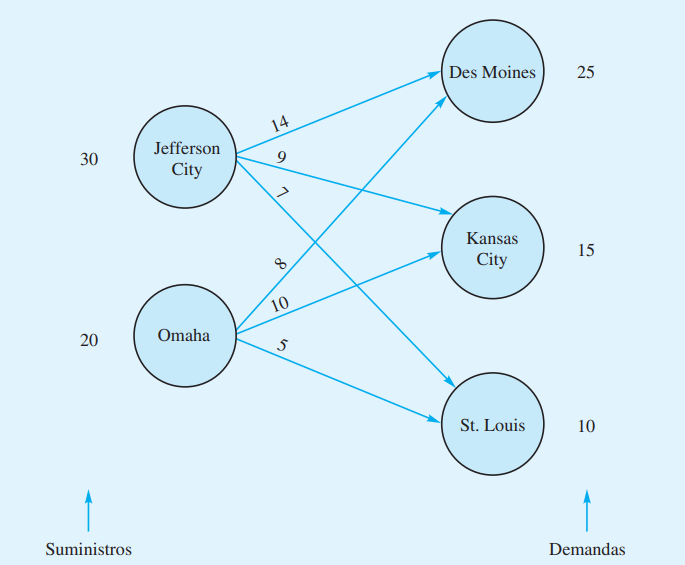

In [ ]:
#OTRO EJEMPLO DE CLASE 
#ALGORITMO DE TRANSPORTE
A_ub = np.array([[1,1,1,0,0,0],   #OFERTA
                 [0,0,0,1,1,1]])                       #Arreglos de coeficientes de restricciones (para mayor o igual, *-1)
                 
A_eq = np.array([[1,0,0,1,0,0],   #DEMANDA         
                 [0,1,0,0,1,0],
                 [0,0,1,0,0,1]]) 
b_ub = np.array([30, 20])      #CAPACIDAD DE SUMINISTRO                            
b_eq = np.array([25, 15, 10])  #DEMANDADO                  #Arreglo de resultados de restricciones
c =    np.array([14,9,7,8,10,15])                         #Arreglo de coeficientes de z, COSTOS DE TRANSPORTE.

res = linprog(c,  A_ub, b_ub,A_eq, b_eq,bounds=(0, None), method='simplex')   #El -c es pa max
print('Z óptimo:', res.fun, '\nX:', res.x)                                    #El valor optimo en este caso es un mínimo

Z óptimo: 435.0 
X: [ 5. 15. 10. 20.  0.  0.]


# Árbol  de expansión mínima
El algoritmo de árbol de expansión mínima enlaza los nodos de una red, en forma directa o indirecta, con la mínima longitud de las ramas enlazantes. Una aplicación característica es en la construcción de carreteras pavimentadas que unen varias poblaciones. El camino entre dos
poblaciones puede pasar por uno o más poblaciones adicionales. El diseño más económico del sistema de caminos indica que se minimice la distancia total de caminos pavimentados, resultado que se obtiene implementando el algoritmo de árbol de expansión mínima.

Normalmente llamamos grafos a las representaciones de las redes, un arbol se define como un grafo que NO tiene ningun ciclo.

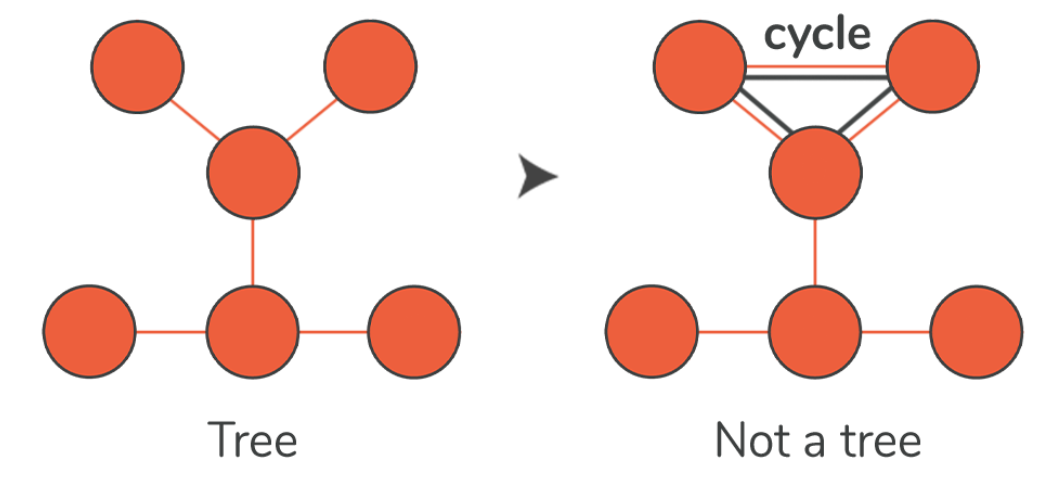



El árbol de expansión mínmima se puede encontrar de dos maneras, con el algoritmo de Prim y con el de Kruskal.

A partir de un grafo, es sencillo encontrar el árbol de expansión mínima. Recordemos que no podemos tener ciclos, si lo que buscamos es minimizar las rutas, iremos conectando todos los nodos aunque sea de manera indirecta con la ruta que tenga menor costo.
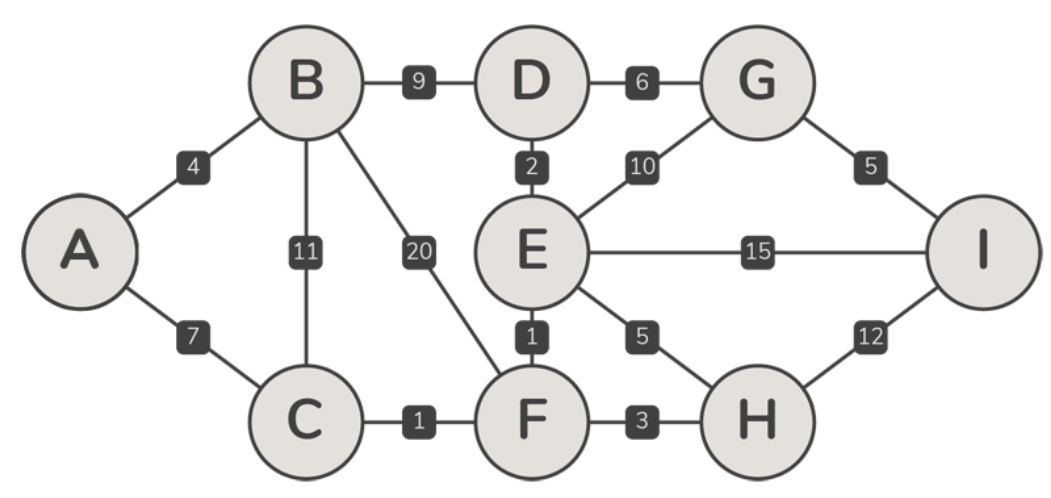

En el caso anterior, podemos empezar por A e ir uniendo los nodos con las rutas mas baratas, evitando ciclos. El arbol será entonces:

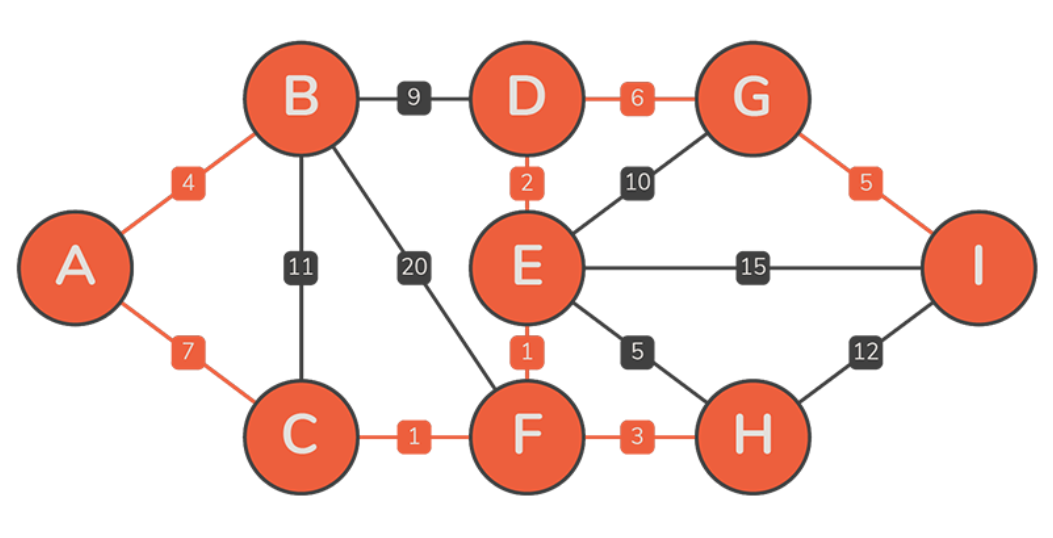

Resolvamos el ejercicio anterior con el algoritmo de Prim implementado en Python. Para ello es necesario saber representar un grafo con una matriz, es sencillo, simplemente se debe poner el nodo en la fila y la columna y despues mapear con los "costos" la conexión que tiene con otros nodos, es por ello que deberemos obtener una matriz simétrica con 0 en la diagonal pues un nodo no se conecta directamente con el mismo.

In [ ]:
#ALGORITMO DE PRIM

INF = 9999999    #definimos un infnito
# número de vértices en el grafo
N = 9
#hay que crear la matriz de adyacencia (conexiones xd)
#Si la defines mal el árbol será erróneo
     #A, B, C, D, E, F, G, H, I 
G = [[0,  4,  7,  0,  0,  0,  0,  0,  0],#A
     [4,  0, 11,  9,  0, 20,  0,  0,  0],#B
     [7, 11,  0,  0,  0,  1,  0,  0,  0],#C
     [0,  9,  0,  0,  2,  0,  6,  0,  0],#D
     [0,  0,  0,  2,  0,  1, 10,  5, 15],#E
     [0, 20,  1,  0,  1,  0,  0,  3,  0],#F
     [0,  0,  0,  6, 10,  0,  0,  0,  5],#G
     [0,  0,  0,  0,  5,  3,  0,  0, 12],#H
     [0,  0,  0,  0, 15,  0,  5, 12,  0]]#I

#NODO DE ORIGEN
selected_node = [0, 0, 0, 0, 0, 0, 0, 0, 0]
no_edge = 0
selected_node[0] = True

# Imprimimos y hacemos algoritmo
print("Unión : Peso\n")
while (no_edge < N - 1):
    
    minimum = INF
    a = 0
    b = 0
    for m in range(N):
        if selected_node[m]:
            for n in range(N):
                if ((not selected_node[n]) and G[m][n]):  
                    # not in selected and there is an edge
                    if minimum > G[m][n]:
                        minimum = G[m][n]
                        a = m
                        b = n
    print(str(a) + " - " + str(b) + ": " + str(G[a][b]))
    selected_node[b] = True
    no_edge += 1

Unión : Peso

0 - 1: 4
0 - 2: 7
2 - 5: 1
5 - 4: 1
4 - 3: 2
5 - 7: 3
3 - 6: 6
6 - 8: 5


El algoritmo de Prim inicia en el nodo que nosotros indiquemos y va evaluando la union mas "ligera" y la agrega al árbol; se repite este proceso hasta tener todos los nodos.

La diferencia entre Prim y Kruskal es que Prim empieza con vértices y Kruskal con conexiones, es decir, Kruskal elige la conexión de menor peso y a partir de ahí va agregando. Prim empieza en un vértice arbitrario, normalmente el primero definido.

Utilicemos ahora el método de Kruskal para resolver el ejercicio.

In [ ]:
# Kruskal
#Clase para crear grafos y ahí mismo aplicar Kruskal
class Graph:
    def __init__(self, num_of_nodes):
        self.m_num_of_nodes = num_of_nodes
        self.m_graph = []

    def add_edge(self, node1, node2, weight):
        self.m_graph.append([node1, node2, weight])
    # Finds the root node of a subtree containing node `i`
    def find_subtree(self, parent, i):
        if parent[i] == i:
            return i
        return self.find_subtree(parent, parent[i])

    # Connects subtrees containing nodes `x` and `y`
    def connect_subtrees(self, parent, subtree_sizes, x, y):
        xroot = self.find_subtree(parent, x)
        yroot = self.find_subtree(parent, y)
        if subtree_sizes[xroot] < subtree_sizes[yroot]:
            parent[xroot] = yroot
        elif subtree_sizes[xroot] > subtree_sizes[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            subtree_sizes[xroot] += 1

    def kruskal(self):
        # Resulting tree
        result = []
        
        # Iterator
        i = 0
        # Number of edges in MST
        e = 0

        # Sort edges by their weight
        self.m_graph = sorted(self.m_graph, key=lambda item: item[2])
        
        # Auxiliary arrays
        parent = []
        subtree_sizes = []

        # Initialize `parent` and `subtree_sizes` arrays
        for node in range(self.m_num_of_nodes):
            parent.append(node)
            subtree_sizes.append(0)

        # Important property of MSTs
        # number of egdes in a MST is 
        # equal to (m_num_of_nodes - 1)
        while e < (self.m_num_of_nodes - 1):
            # Pick an edge with the minimal weight
            node1, node2, weight = self.m_graph[i]
            i = i + 1

            x = self.find_subtree(parent, node1)
            y = self.find_subtree(parent, node2)

            if x != y:
                e = e + 1
                result.append([node1, node2, weight])
                self.connect_subtrees(parent, subtree_sizes, x, y)
        
        # Print the resulting MST
        for node1, node2, weight in result:
            print("%d - %d: %d" % (node1, node2, weight))

In [ ]:
#Aquí ejecutamos el algoritmo definido en una función en la celda anterior
#Ponemos la union entre que nodos y su peso, los nodos los denotaremos con números
# A=0, B=1, etc
grafo = Graph(9)
grafo.add_edge(0, 1, 4)
grafo.add_edge(0, 2, 7)
grafo.add_edge(1, 2, 11)
grafo.add_edge(1, 3, 9)
grafo.add_edge(1, 5, 20)
grafo.add_edge(2, 5, 1)
grafo.add_edge(3, 4, 2)
grafo.add_edge(3, 6, 6)
grafo.add_edge(4, 6, 10)
grafo.add_edge(4, 8, 15)
grafo.add_edge(4, 7, 5)
grafo.add_edge(4, 5, 1)
grafo.add_edge(5, 7, 3)
grafo.add_edge(6, 8, 5)
grafo.add_edge(7, 8, 12)

# Una vez armado el grafo, llamamos a la función Kruskal
grafo.kruskal()

2 - 5: 1
4 - 5: 1
3 - 4: 2
5 - 7: 3
0 - 1: 4
6 - 8: 5
3 - 6: 6
0 - 2: 7


Vemos que el resultado es correcto como en el de Prim. 

Un plus es definir los grafos sin necesidad de escribir toda la matriz, es por ello que para el de prim podemos hacer algo similar. Como los grafos se definen de la misma manera, basta con agregar una función que haga Prim a la clase Graph.

In [ ]:
#Clase para crear grafos y ahí mismo aplicar Kruskal o Prim
class Graph:
    def __init__(self, num_of_nodes):
        self.m_num_of_nodes = num_of_nodes
        # Initialize the adjacency matrix with zeros
        self.m_graph = [] 
        self.m_graphp = [[0 for column in range(num_of_nodes)] 
                    for row in range(num_of_nodes)]

    def add_edge(self, node1, node2, weight):
        self.m_graphp[node1][node2] = weight
        self.m_graphp[node2][node1] = weight
        self.m_graph.append([node1, node2, weight])

    # Finds the root node of a subtree containing node `i`
    def find_subtree(self, parent, i):
        if parent[i] == i:
            return i
        return self.find_subtree(parent, parent[i])

    # Connects subtrees containing nodes `x` and `y`
    def connect_subtrees(self, parent, subtree_sizes, x, y):
        xroot = self.find_subtree(parent, x)
        yroot = self.find_subtree(parent, y)
        if subtree_sizes[xroot] < subtree_sizes[yroot]:
            parent[xroot] = yroot
        elif subtree_sizes[xroot] > subtree_sizes[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            subtree_sizes[xroot] += 1

    def kruskal(self):
        # Resulting tree
        result = []
        
        # Iterator
        i = 0
        # Number of edges in MST
        e = 0

        # Sort edges by their weight
        self.m_graph = sorted(self.m_graph, key=lambda item: item[2])
        
        # Auxiliary arrays
        parent = []
        subtree_sizes = []

        # Initialize `parent` and `subtree_sizes` arrays
        for node in range(self.m_num_of_nodes):
            parent.append(node)
            subtree_sizes.append(0)

        # Important property of MSTs
        # number of egdes in a MST is 
        # equal to (m_num_of_nodes - 1)
        while e < (self.m_num_of_nodes - 1):
            # Pick an edge with the minimal weight
            node1, node2, weight = self.m_graph[i]
            i = i + 1

            x = self.find_subtree(parent, node1)
            y = self.find_subtree(parent, node2)

            if x != y:
                e = e + 1
                result.append([node1, node2, weight])
                self.connect_subtrees(parent, subtree_sizes, x, y)
        
        # Print the resulting MST
        for node1, node2, weight in result:
            print("%d - %d: %d" % (node1, node2, weight))

    def prim(self):
        # Defining a really big number, that'll always be the highest weight in comparisons
        postitive_inf = float('inf')

        # This is a list showing which nodes are already selected 
        # so we don't pick the same node twice and we can actually know when stop looking
        selected_nodes = [False for node in range(self.m_num_of_nodes)]

        # Matrix of the resulting MST
        result = [[0 for column in range(self.m_num_of_nodes)] 
                    for row in range(self.m_num_of_nodes)]
        
        indx = 0
        
        # While there are nodes that are not included in the MST, keep looking:
        while(False in selected_nodes):
            # We use the big number we created before as the possible minimum weight
            minimum = postitive_inf

            # The starting node
            start = 0

            # The ending node
            end = 0

            for i in range(self.m_num_of_nodes):
                # If the node is part of the MST, look its relationships
                if selected_nodes[i]:
                    for j in range(self.m_num_of_nodes):
                        # If the analyzed node have a path to the ending node AND its not included in the MST (to avoid cycles)
                        if (not selected_nodes[j] and self.m_graphp[i][j]>0):  
                            # If the weight path analized is less than the minimum of the MST
                            if self.m_graphp[i][j] < minimum:
                                # Defines the new minimum weight, the starting vertex and the ending vertex
                                minimum = self.m_graphp[i][j]
                                start, end = i, j
            
            # Since we added the ending vertex to the MST, it's already selected:
            selected_nodes[end] = True

            # Filling the MST Adjacency Matrix fields:
            result[start][end] = minimum
            
            if minimum == postitive_inf:
                result[start][end] = 0

            indx += 1
            
            result[end][start] = result[start][end]

        # Print the resulting MST
        # for node1, node2, weight in result:
        for i in range(len(result)):
            for j in range(0+i, len(result)):
                if result[i][j] != 0:
                    print("%d - %d: %d" % (i, j, result[i][j]))

In [ ]:
#Aquí ejecutamos el algoritmo definido en una función en la celda anterior
#Ponemos la union entre que nodos y su peso, los nodos los denotaremos con números
#pero se definen diferente entonces usamos _k y _p
# A=0, B=1, etc
grafo = Graph(9)
grafo.add_edge(0, 1, 4)
grafo.add_edge(0, 2, 7)
grafo.add_edge(1, 2, 11)
grafo.add_edge(1, 3, 9)
grafo.add_edge(1, 5, 20)
grafo.add_edge(2, 5, 1)
grafo.add_edge(3, 4, 2)
grafo.add_edge(3, 6, 6)
grafo.add_edge(4, 6, 10)
grafo.add_edge(4, 8, 15)
grafo.add_edge(4, 7, 5)
grafo.add_edge(4, 5, 1)
grafo.add_edge(5, 7, 3)
grafo.add_edge(6, 8, 5)
grafo.add_edge(7, 8, 12)
###########
print("Prim")
grafo.prim()
print("------------\n Kruskal")
grafo.kruskal()


Prim
0 - 1: 4
0 - 2: 7
2 - 5: 1
3 - 4: 2
3 - 6: 6
4 - 5: 1
5 - 7: 3
6 - 8: 5
------------
 Kruskal
2 - 5: 1
4 - 5: 1
3 - 4: 2
5 - 7: 3
0 - 1: 4
6 - 8: 5
3 - 6: 6
0 - 2: 7


Veamos otro ejemplo con ambos algoritmos 

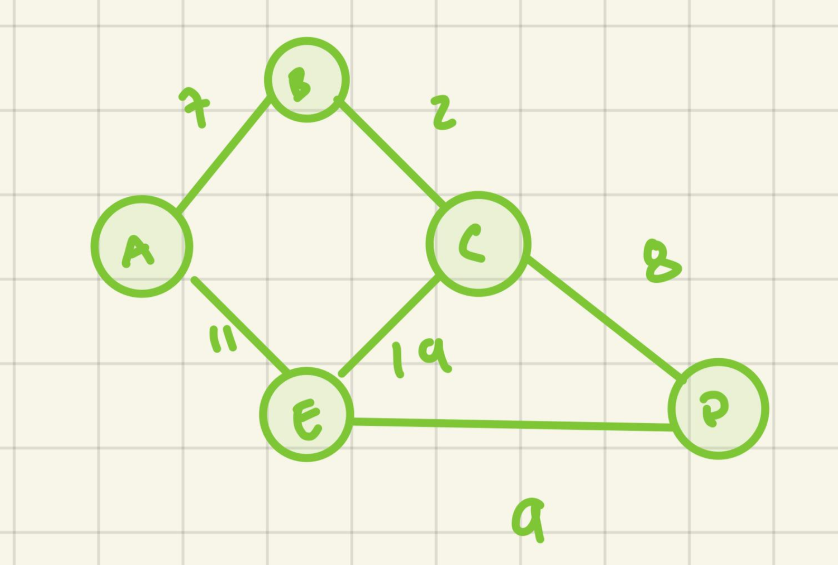

In [ ]:
grafo = Graph(5)
grafo.add_edge(0, 1, 7)
grafo.add_edge(0, 3, 11)
grafo.add_edge(1, 2, 2)
grafo.add_edge(2, 3, 8)
grafo.add_edge(2, 4, 19)
grafo.add_edge(3, 4, 9)

###########
print("Prim")
grafo.prim()
print("------------\n Kruskal")
grafo.kruskal()

Prim
0 - 1: 7
1 - 2: 2
2 - 3: 8
3 - 4: 9
------------
 Kruskal
1 - 2: 2
0 - 1: 7
2 - 3: 8
3 - 4: 9


Veamos un ejemplo mas:


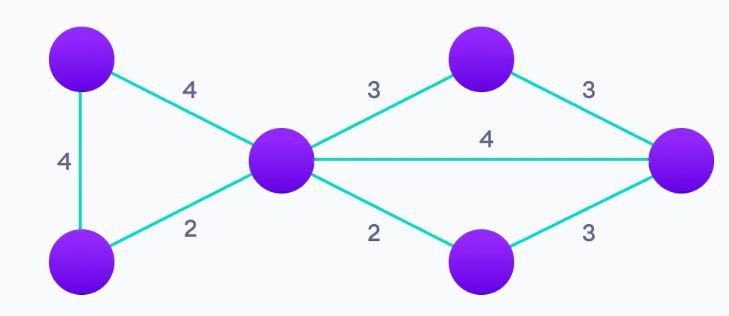

In [ ]:
grafo = Graph(6)
grafo.add_edge(0, 1, 4)
grafo.add_edge(0, 2, 4)
grafo.add_edge(1, 2, 2)
grafo.add_edge(2, 3, 3)
grafo.add_edge(2, 4, 2)
grafo.add_edge(4, 5, 4)
grafo.add_edge(3, 5, 3)
grafo.add_edge(4, 5, 3)

###########
print("Prim")
grafo.prim()
print("------------\n Kruskal")
grafo.kruskal()

Prim
0 - 1: 4
1 - 2: 2
2 - 3: 3
2 - 4: 2
3 - 5: 3
------------
 Kruskal
1 - 2: 2
2 - 4: 2
2 - 3: 3
3 - 5: 3
0 - 1: 4


Podemos observar que ambos algoritmos siguen llegando al mismo árbol de expansión pero en orden distinto justo por la diferencia de inicios de los algoritmos.



# Métodos CPM y PERT

PERT (Program Evaluation and Review Techniques) y CPM (Critical Path Method) son dos métodos para la determinación de la ruta
crítica de las actividades de un proyecto determinado. La idea general es
mostrar un proyecto con ayuda de recursos gráficos y relacionar sus
componentes en tal forma que permita determinar cuales
actividades son cruciales para la finalización del proyecto. Para
lograr tal fin los proyectos deben tener las siguientes
características.
1. Se deben tener actividades bien definidas y su terminación
debe marcar la del proyecto.
2. Las actividades
deben ser independientes en el sentido en que deben
comenzar, detenerse y conducirse por completo. Una actividad si puede depender de otra para su comienzo, sin embargo, una vez iniciada debe poderse concluir.
3. Las actividades deben estar ordenadas en tal forma que una
siga a otra en una secuencia dada.

Normalmente el método PERT-CPM es útil para hacer los cronograas de actvidades o diagramas de Gant. El recurso gráfico se explica a continuación.

Utilizaremos redes en las cuales se representará cada tarea para completar el proyecto, en cada nodo va una tarea con características como sus tiempos de inicio y término o su duración. Veamos su estructura.

- Supongamos que tenemos una actividad a la que llamaremos "A" cuyo tiempo de realización es de 3 semanas. Su nodo quedará como sigue.




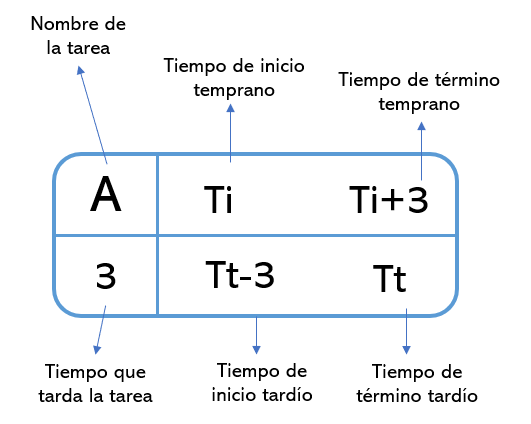

Finalmente se deberá armar toda una red de las tareas que se deben realizar para terminar el proyecto, uniendo con una linea las predecesora inmediatas de cada una.

El renglón de los tiempos tempranos se debe ir llenando de izquierda a derecha tomando como tiempo inicial el t=0, que es el día en que iniciaremos el proyecto. Una tarea puede iniciar hasta que las antecesoras necesarias ya terminaron.

El renglón de los tiempos tardíos se llena de derecha a izquierda tomando como inicio el tiempo final que es el total de tiempo disponible para la realización  del proyecto. 

Finalmente deberemos obtener la ruta crítica que es la ruta en la que no existe holgura. La holgura se define como la diferencia entre los tiempos tempranos y tardíos.
$$holgura=h=Ti_{tardio} -Ti_{temprano}=Tt_{tardio} -Tt_{temprano}$$

La ruta crítica será aquella a la que se le debe dar prioridad en el proyecto ya que no puede tener retraso alguno.

Veamos un ejemplo.

La empresa PepoTech tiene 15 semanas para desarrollar un proyecto que tiene que ver con la creación de submarinos de turismo y han desglosado las actividades de la siguiente manera.

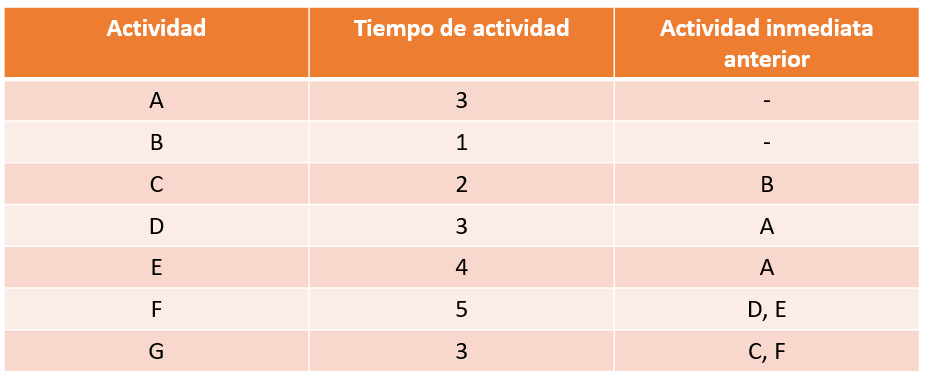



Con la tabla anterior de esa manera es sencillo construir nuestra red de actividades que recordando las reglas anteriores y por supuesto usando un poco de lógica obtenemos lo siguiente

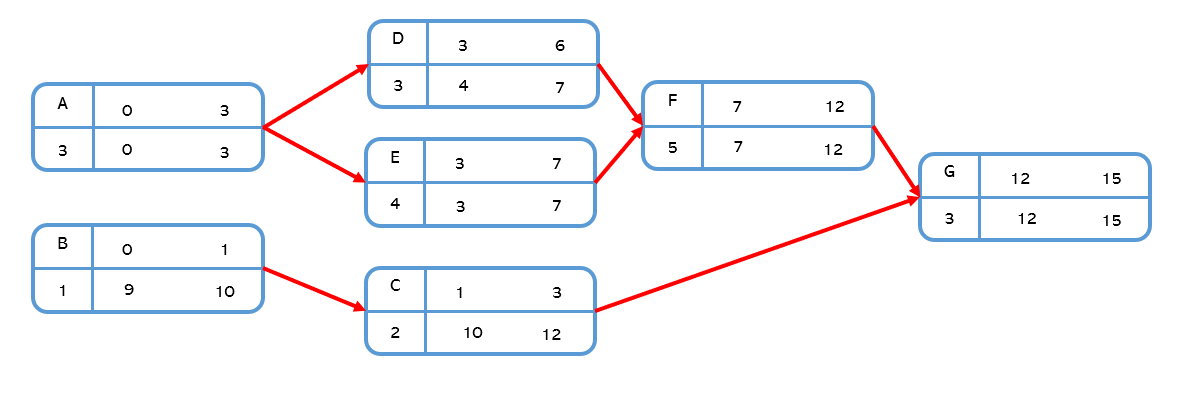

Queda obtener la holgura para cada tarea y así obtener la ruta crítica, si es que la hay.

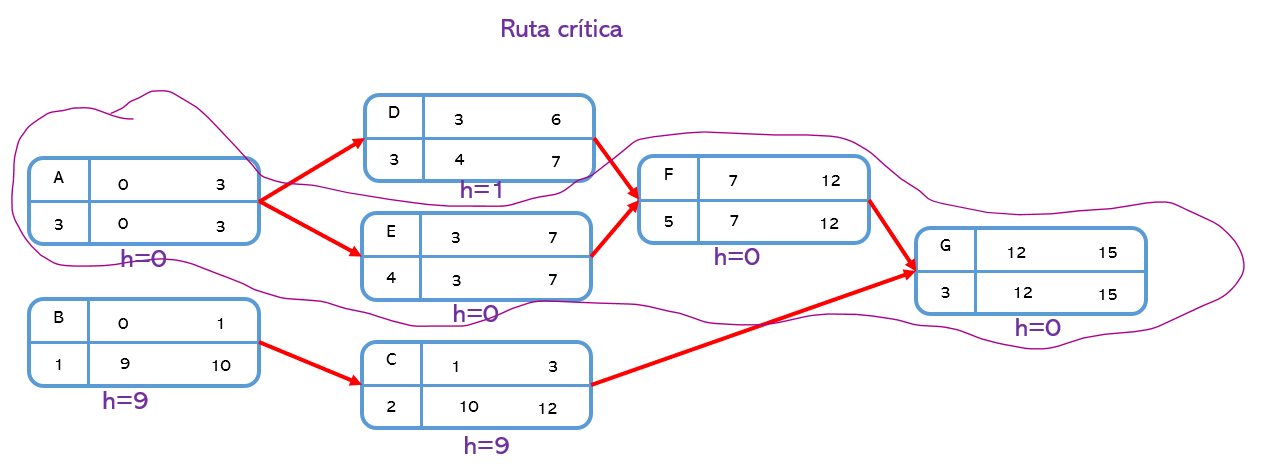

Podemos ver que la ampresa alcanza a terminar el proyecto justo en las 15 semanas siempre y cuando se cuide la ruta crítica.

# Relaciones Hombre Máquina

En términos generales, decimos que es la disciplina que estudia el intercambio de información entre las personas y las computadoras. Se encarga del diseño, evaluación e implementación de los aparatos tecnológicos interactivos, estudiando el mayor número de casos que les pueda llegar a afectar. El objetivo es que el intercambio de información sea más eficiente, es decir, minimizar errores, incrementar la satisfacción, disminuir la frustración y, en definitiva, hacer más productivas las tareas que rodean a las personas y las computadoras.

Un reciente estudio publicado por Dell Technologies desvela que en 2030 el 85% de los empleos que se desarrollarán no existen todavía. Un dato que, sin duda, no pasa desapercibido, ya que en tan solo 13 años el panorama laboral que actualmente conocemos, sufrirá una profunda transformación.

Todos estos empleos necesitarán procesos y ser optimizados, es por ello que la investigación de operaciones seguirá vigente y es una materia de estudio de suma importancia hoy en día.




# Bibliografía


1.  Frederick S. Hillier & Gerald J. Lieberman, "Introducción a la investigación de operaciones", 9na edición, Mc Graw Hill, 2010 México, ISBN: 978-607-15-0308-4
2.   Anderson, Sweeney, Williams, Camm & Martin, "Métodos Cuantitativos para los negocios", 11va edición, CENGAGE Learning, 2011 México. 
3.   Administración de empresas constructoras "Métodos PERT y CPM" recuperado de: http://aducarte.weebly.com/uploads/5/1/2/7/5127290/clase_12_pert-cpm.pdf

4.   Pamela Chaig, Biblioteca Digital Mundial, Definicion de relaciones hombre-máquina. Recuperado de: https://sites.google.com/site/seminario1les/contenido-de-la-asignatura/Unidad-N2/2-La-relacion-Hombre-Mquina-y-su-esquematizacion/21-Definicin-de-Interaccion-Hombre-Maquina

5. CICE La escuela profesional de nuevas tecnologías, “La próxima era de las relaciones hombre-máquina”, recuperado de: https://www.cice.es/blog/articulos/la-proxima-era-de-las-relaciones-hombre-maquina/

6. FavTutor, "Prim's Algorithm | Minimum Spanning Tree (Python Code)", Jul 20, 2021, recuperado de: https://favtutor.com/blogs/prims-algorithm-python
7. Dimitrije Stamenic, "Graphs in Python: Minimum Spanning Trees - Kruskal's Algorithm", recuperado de: https://stackabuse.com/graphs-in-python-minimum-spanning-trees-kruskals-algorithm/
8. Dimitrije Stamenic, "Graphs in Python: Minimum Spanning Trees - Prim's Algorithm", recuperado de: https://stackabuse.com/graphs-in-python-minimum-spanning-trees-prims-algorithm/

